# Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Methodology

    1. Data understanding
    2. Data cleaning
    3. Visualization
    4. Data preparation
    5. Model Building
        5.1 Model with interpretability
        5.2 Model with good prediction

In [1]:
# importing necessary libraries 
#importing necessary libraries to handle data 
import numpy as np
import pandas as pd
#importing necessary libraries for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

#Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

#Displaying the full column width
pd.set_option('display.max_colwidth', -1)

In [2]:
# setting the max rows display
pd.set_option('display.max_rows',500)
# reading the data description
datadescription = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
datadescription

Acronyms      \
0   MOBILE_NUMBER   
1   CIRCLE_ID       
2   LOC             
3   STD             
4   IC              
5   OG              
6   T2T             
7   T2M             
8   T2O             
9   T2F             
10  T2C             
11  ARPU            
12  MOU             
13  AON             
14  ONNET           
15  OFFNET          
16  ROAM            
17  SPL             
18  ISD             
19  RECH            
20  NUM             
21  AMT             
22  MAX             
23  DATA            
24  3G              
25  AV              
26  VOL             
27  2G              
28  PCK             
29  NIGHT           
30  MONTHLY         
31  SACHET          
32  *.6             
33  *.7             
34  *.8             
35  *.9             
36  FB_USER         
37  VBC             

                                                                          Descriptions  
0   Customer phone number                                                               
1   Telecom circle area to which the customer belongs to                                
2   Local calls - within same telecom circle                                            
3   STD calls - outside the calling circle                                              
4   Incoming calls                                                                      
5   Outgoing calls                                                                      
6   Operator T to T, i.e. within same operator (mobile to mobile)                       
7   Operator T to other operator mobile                                                 
8   Operator T to other operator fixed line                                             
9   Operator T to fixed lines of T                                                      
10  Operator T to it’s own call center                                                  
11  Average revenue per user                                                            
12  Minutes of usage - voice calls                                                      
13  Age on network - number of days the customer is using the operator T network        
14  All kind of calls within the same operator network                                  
15  All kind of calls outside the operator T network                                    
16  Indicates that customer is in roaming zone during the call                          
17  Special calls                                                                       
18  ISD calls                                                                           
19  Recharge                                                                            
20  Number                                                                              
21  Amount in local currency                                                            
22  Maximum                                                                             
23  Mobile internet                                                                     
24  3G network                                                                          
25  Average                                                                             
26  Mobile internet usage volume (in MB)                                                
27  2G network                                                                          
28  Prepaid service schemes called - PACKS                                              
29  Scheme to use during specific night hours only                                      
30  Service schemes with validity equivalent to a month                                 
31  Service schemes with validity smaller than a month                                  
32  KPI for the month of June                                                           
33  KPI for the month of July                                                           
34  KPI for the month of August                                       

In [3]:
#reading the data
telecomChurn_df = pd.read_csv("telecom_churn_data.csv")
#reading the top 5 rows
telecomChurn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0  9/30/2014            197.385  ...  0            1.0        1.0         
1  9/30/2014            34.047   ...  0           NaN         1.0         
2  9/30/2014            167.690  ...  0           NaN        NaN          
3  9/30/2014            221.338  ...  0           NaN        NaN          
4  9/30/2014            261.636  ...  0            0.0       NaN          

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0  1.0       NaN         968   30.4        0.0         101.20      3.58        
1  1.0       NaN         1006  0.0         0.0         0.00        0.00        
2 NaN         1.0        1103  0.0         0.0         4.17        0.00        
3 NaN        NaN         2491  0.0         0.0         0.00        0.00        
4 NaN        NaN         1526  0.0         0.0         0.00        0.00        

[5 rows x 226 columns]

In [4]:
#information about the data frame
telecomChurn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#checking for the duplicate values
any(telecomChurn_df.duplicated())

False

From the above, we can see that there are no duplicates found in the dataset hence we are good to continue with the process.

In [6]:
#describing the dataset
telecomChurn_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  9.999900e+04   99999.0    98981.0         98981.0          
mean   7.001207e+09   109.0      0.0             0.0              
std    6.956694e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000606e+09   109.0      0.0             0.0              
50%    7.001205e+09   109.0      0.0             0.0              
75%    7.001812e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  98981.0         99999.000000  99999.000000  99999.000000  99999.000000   
mean   0.0             282.987358    278.536648    279.154731    261.645069     
std    0.0             328.439770    338.156291    344.474791    341.998630     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             93.411500     86.980500     84.126000     62.685000      
50%    0.0             197.704000    191.640000    192.080000    176.849000     
75%    0.0             371.060000    365.344500    369.370500    353.466500     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean   132.395875    ...  0.084581      0.914404      0.908764       
std    297.207406    ...  0.650457      0.279772      0.287950       
min    0.000000      ...  0.000000      0.000000      0.000000       
25%    7.380000      ...  0.000000      1.000000      1.000000       
50%    34.310000     ...  0.000000      1.000000      1.000000       
75%    118.740000    ...  0.000000      1.000000      1.000000       
max    7376.710000   ...  49.000000     1.000000      1.000000       

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean   0.890808      0.860968      1219.854749   68.170248     66.839062      
std    0.311885      0.345987      954.733842    267.580450    271.201856     
min    0.000000      0.000000      180.000000    0.000000      0.000000       
25%    1.000000      1.000000      467.000000    0.000000      0.000000       
50%    1.000000      1.000000      863.000000    0.000000      0.000000       
75%    1.000000      1.000000      1807.500000   0.000000      0.000000       
max    1.000000      1.000000      4337.000000   12916.220000  9165.600000    

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean   60.021204     3.299373      
std    253.938223    32.408353     
min    0.000000      0.000000      
25%    0.000000      0.000000      
50%    0.000000      0.000000      
75%    0.000000      0.000000      
max    11166.210000  2618.570000   

[8 rows x 214 columns]

In [7]:
#shape of the dataframe
telecomChurn_df.shape

(99999, 226)

In [8]:
#checking for missing values
round(100*(telecomChurn_df.isnull().sum()/len(telecomChurn_df.index)), 2).sort_values(ascending = False) 

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

## Missing Value Treatment

There are columns are having the more than 70% of missing data values. even if we impute those values with any other value the data will be skewed with one data point and there wont be any variance with these columns. Hence we are droping the columns which are having more than 70% of missing data

In [9]:
telecomChurn_df.drop(['count_rech_2g_6','date_of_last_rech_data_6','count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6',
'total_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','arpu_3g_7','count_rech_2g_7','fb_user_7',
'count_rech_3g_7','arpu_2g_7','av_rech_amt_data_7','max_rech_data_7','night_pck_user_7','total_rech_data_7','date_of_last_rech_data_7',
'night_pck_user_9','date_of_last_rech_data_9','fb_user_9','arpu_2g_9','max_rech_data_9','arpu_3g_9','total_rech_data_9','av_rech_amt_data_9',
'count_rech_3g_9','count_rech_2g_9','fb_user_8','av_rech_amt_data_8','count_rech_3g_8','count_rech_2g_8',
'date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8'],axis=1,inplace=True)

In [10]:
#shape of the dataframe after missing values 
telecomChurn_df.shape

(99999, 186)

In [11]:
#checking for missing values
round(100*(telecomChurn_df.isnull().sum()/len(telecomChurn_df.index)), 2).sort_values(ascending = False)

loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
std_ic_t2f_mou_9        7.75
std_ic_t2t_mou_9        7.75
roam_og_mou_9           7.75
loc_ic_mou_9            7.75
loc_og_t2t_mou_9        7.75
loc_ic_t2f_mou_9        7.75
roam_ic_mou_9           7.75
ic_others_9             7.75
loc_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
offnet_mou_9            7.75
loc_ic_t2t_mou_9        7.75
std_ic_mou_9            7.75
onnet_mou_9             7.75
og_others_9             7.75
std_og_mou_9            7.75
isd_ic_mou_9            7.75
std_og_t2m_mou_9        7.75
std_og_t2f_mou_9        7.75
loc_og_t2f_mou_9        7.75
std_og_t2c_mou_9        7.75
spl_ic_mou_9            7.75
isd_og_mou_9            7.75
loc_og_t2c_mou_9        7.75
spl_og_mou_9            7.75
loc_og_t2m_mou_9        7.75
std_ic_t2m_mou_9        7.75
spl_ic_mou_8            5.38
std_ic_t2f_mou_8        5.38
isd_ic_mou_8            5.38
std_ic_t2o_mou_8        5.38
loc_og_mou_8            5.38
loc_ic_t2f_mou

In [12]:
telecomChurn_df.nunique()

mobile_number           99999
circle_id               1    
loc_og_t2o_mou          1    
std_og_t2o_mou          1    
loc_ic_t2o_mou          1    
last_date_of_month_6    1    
last_date_of_month_7    1    
last_date_of_month_8    1    
last_date_of_month_9    1    
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6           6512 
roam_ic_mou_7           5230 
roam_ic_mou_8           5315 
roam_ic_mou_9           4827 
roam_og_mou_6           8038 
roam_og_mou_7           6639 
roam_og_mou_8           6504 
roam_og_mou_9           5882 
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m

There are some columns which are having only value and their presence in the analysis of data does not make any sense. Hence we are removing the unique value columns. 

In [13]:
telecomChurn_df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7',
'last_date_of_month_8','last_date_of_month_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9'],axis=1,inplace=True)

In [14]:
#Shape of the data frame after removing missing value columns
telecomChurn_df.shape

(99999, 170)

In [15]:
#checking for the missing values 
any(round(100*(telecomChurn_df.isnull().sum()/len(telecomChurn_df.index)), 2).sort_values(ascending = False))

True

In [16]:
#checking for missing values
round(100*(telecomChurn_df.isnull().sum()/len(telecomChurn_df.index)), 2).sort_values(ascending = False)

loc_ic_t2f_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_og_t2m_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
loc_og_t2t_mou_9       7.75
loc_ic_mou_9           7.75
loc_og_mou_9           7.75
roam_og_mou_9          7.75
std_og_t2m_mou_9       7.75
std_og_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
roam_ic_mou_9          7.75
spl_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_og_t2f_mou_9       7.75
offnet_mou_9           7.75
std_og_t2f_mou_9       7.75
og_others_9            7.75
onnet_mou_9            7.75
isd_ic_mou_9           7.75
spl_og_mou_9           7.75
isd_og_mou_9           7.75
loc_og_t2c_mou_9       7.75
std_og_mou_9           7.75
ic_others_9            7.75
isd_ic_mou_8           5.38
std_og_t2m_mou_8       5.38
ic_others_8            5.38
std_ic_mou_8           5.38
loc_ic_mou_8           5.38
std_ic_t2f_mou_8       5.38
std_ic_t2m_mou_8       5.38
std_ic_t2t_mou_8       5.38
loc_ic_t2f_mou_8    

In [17]:
#converting date of last recharge to day to handle the missing values
telecomChurn_df['date_of_last_rech_6'] = pd.to_datetime(telecomChurn_df.date_of_last_rech_6).dt.day
telecomChurn_df['date_of_last_rech_7'] = pd.to_datetime(telecomChurn_df.date_of_last_rech_7).dt.day
telecomChurn_df['date_of_last_rech_8'] = pd.to_datetime(telecomChurn_df.date_of_last_rech_8).dt.day
telecomChurn_df['date_of_last_rech_9'] = pd.to_datetime(telecomChurn_df.date_of_last_rech_9).dt.day

In [18]:
#imputing Median for LotFrontage as it the data is having some outliers too.
missing_cols = telecomChurn_df.columns[telecomChurn_df.isnull().sum()/len(telecomChurn_df.index) > 0.00]
for col in missing_cols:
    telecomChurn_df[col].fillna((telecomChurn_df[col].median()), inplace=True)

In [19]:
#checking for missing values
any(round(100*(telecomChurn_df.isnull().sum()/len(telecomChurn_df.index)), 2).sort_values(ascending = False))

False

There are no missing values in the data frame. hence we will proeed further for analysis.

In [20]:
telecomChurn_df.shape

(99999, 170)

## High Value Customers

High value customers are those 80% of the revenue comes from the 20% of the customers. Here will findout the top customers who are spending more. 

In [21]:

telecomChurn_df['avg_rech_6_7'] = (telecomChurn_df['total_rech_amt_6'] + telecomChurn_df['total_rech_amt_7'])/2
telecomChurn_df = telecomChurn_df[telecomChurn_df['avg_rech_6_7'] > telecomChurn_df['avg_rech_6_7'].quantile(0.70)]
telecomChurn_df.shape

(29979, 171)

We are getting 29,979 rows after selecting the customers who have recharged with more than or equal to the recharge value of the 70th percentile customer.

In [22]:
# Calculate total usage for 9th month
telecomChurn_df['total_usage_9'] = telecomChurn_df['total_og_mou_9'] + telecomChurn_df['total_ic_mou_9'] + telecomChurn_df['vol_2g_mb_9'] + telecomChurn_df['vol_3g_mb_9']

In [23]:
# Calculate Churn: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
telecomChurn_df['churn'] = np.where(telecomChurn_df['total_usage_9']== 0, 1, 0)
telecomChurn_df['churn'].value_counts()

0    27390
1    2589 
Name: churn, dtype: int64

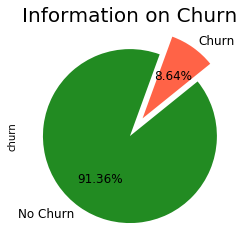

In [24]:
ax = figsize=(16, 8)
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.title('Information on Churn', fontsize=20)

telecomChurn_df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)



In [25]:
# delete columns that belong to the churn month (9th month)
telecomChurn_df = telecomChurn_df.drop(telecomChurn_df.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [26]:
#shape of the data frame after removing the 9th / september value columns
telecomChurn_df.shape

(29979, 130)

In [27]:
#checking for the churn percentage by creating Y column with the churn value and calculating its percentage
y = telecomChurn_df['churn']
churn = (sum(y)/len(y.index))*100
#printing the percentage of Churn
print(churn)
#shape of the data frame 
print(telecomChurn_df.shape)

8.636045231662164
(29979, 130)


In [28]:
#checking for the top 5 rows after removing september month data and missing  vlaue treatment
telecomChurn_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7   7000701601     1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846     378.721   492.223   137.362   413.69       351.03        
13  7002191713     492.846   205.671   593.260   501.76       108.39        
16  7000875565     430.975   299.869   187.894   50.51        74.01         
17  7000187447     690.008   18.980    25.499    1185.91      9.28          

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_8  \
7   52.29        453.43        567.16        325.91        ...  0              
8   35.08        94.66         80.63         136.48        ...  0              
13  534.24       413.31        119.28        482.46        ...  0              
16  70.61        296.29        229.74        162.76        ...  0              
17  7.79         61.64         0.00          5.54          ...  0              

    sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
7   0            0            0            802   57.74       19.38        
8   0            0            0            315   21.03       910.65       
13  0            0            0            2607  0.00        0.00         
16  0            0            0            511   0.00        2.45         
17  0            0            0            667   0.00        0.00         

    jun_vbc_3g  avg_rech_6_7  churn  
7   18.74       1185.0        1      
8   122.16      519.0         0      
13  0.00        380.0         0      
16  21.89       459.0         0      
17  0.00        408.0         0      

[5 rows x 130 columns]

In [29]:
telecom_df = telecomChurn_df.copy(deep=True)
telecom_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7   7000701601     1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846     378.721   492.223   137.362   413.69       351.03        
13  7002191713     492.846   205.671   593.260   501.76       108.39        
16  7000875565     430.975   299.869   187.894   50.51        74.01         
17  7000187447     690.008   18.980    25.499    1185.91      9.28          

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_8  \
7   52.29        453.43        567.16        325.91        ...  0              
8   35.08        94.66         80.63         136.48        ...  0              
13  534.24       413.31        119.28        482.46        ...  0              
16  70.61        296.29        229.74        162.76        ...  0              
17  7.79         61.64         0.00          5.54          ...  0              

    sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
7   0            0            0            802   57.74       19.38        
8   0            0            0            315   21.03       910.65       
13  0            0            0            2607  0.00        0.00         
16  0            0            0            511   0.00        2.45         
17  0            0            0            667   0.00        0.00         

    jun_vbc_3g  avg_rech_6_7  churn  
7   18.74       1185.0        1      
8   122.16      519.0         0      
13  0.00        380.0         0      
16  21.89       459.0         0      
17  0.00        408.0         0      

[5 rows x 130 columns]

In [30]:
#we are droping the mobile number as it is the unique value in each row
telecomChurn_df.drop(['mobile_number'],axis=1,inplace=True)

In [31]:
#checking the information of the data frame.
telecomChurn_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 129 columns):
arpu_6                 29979 non-null float64
arpu_7                 29979 non-null float64
arpu_8                 29979 non-null float64
onnet_mou_6            29979 non-null float64
onnet_mou_7            29979 non-null float64
onnet_mou_8            29979 non-null float64
offnet_mou_6           29979 non-null float64
offnet_mou_7           29979 non-null float64
offnet_mou_8           29979 non-null float64
roam_ic_mou_6          29979 non-null float64
roam_ic_mou_7          29979 non-null float64
roam_ic_mou_8          29979 non-null float64
roam_og_mou_6          29979 non-null float64
roam_og_mou_7          29979 non-null float64
roam_og_mou_8          29979 non-null float64
loc_og_t2t_mou_6       29979 non-null float64
loc_og_t2t_mou_7       29979 non-null float64
loc_og_t2t_mou_8       29979 non-null float64
loc_og_t2m_mou_6       29979 non-null float64
loc_og_t2m_mou_7

## EDA

### Correlation Analysis

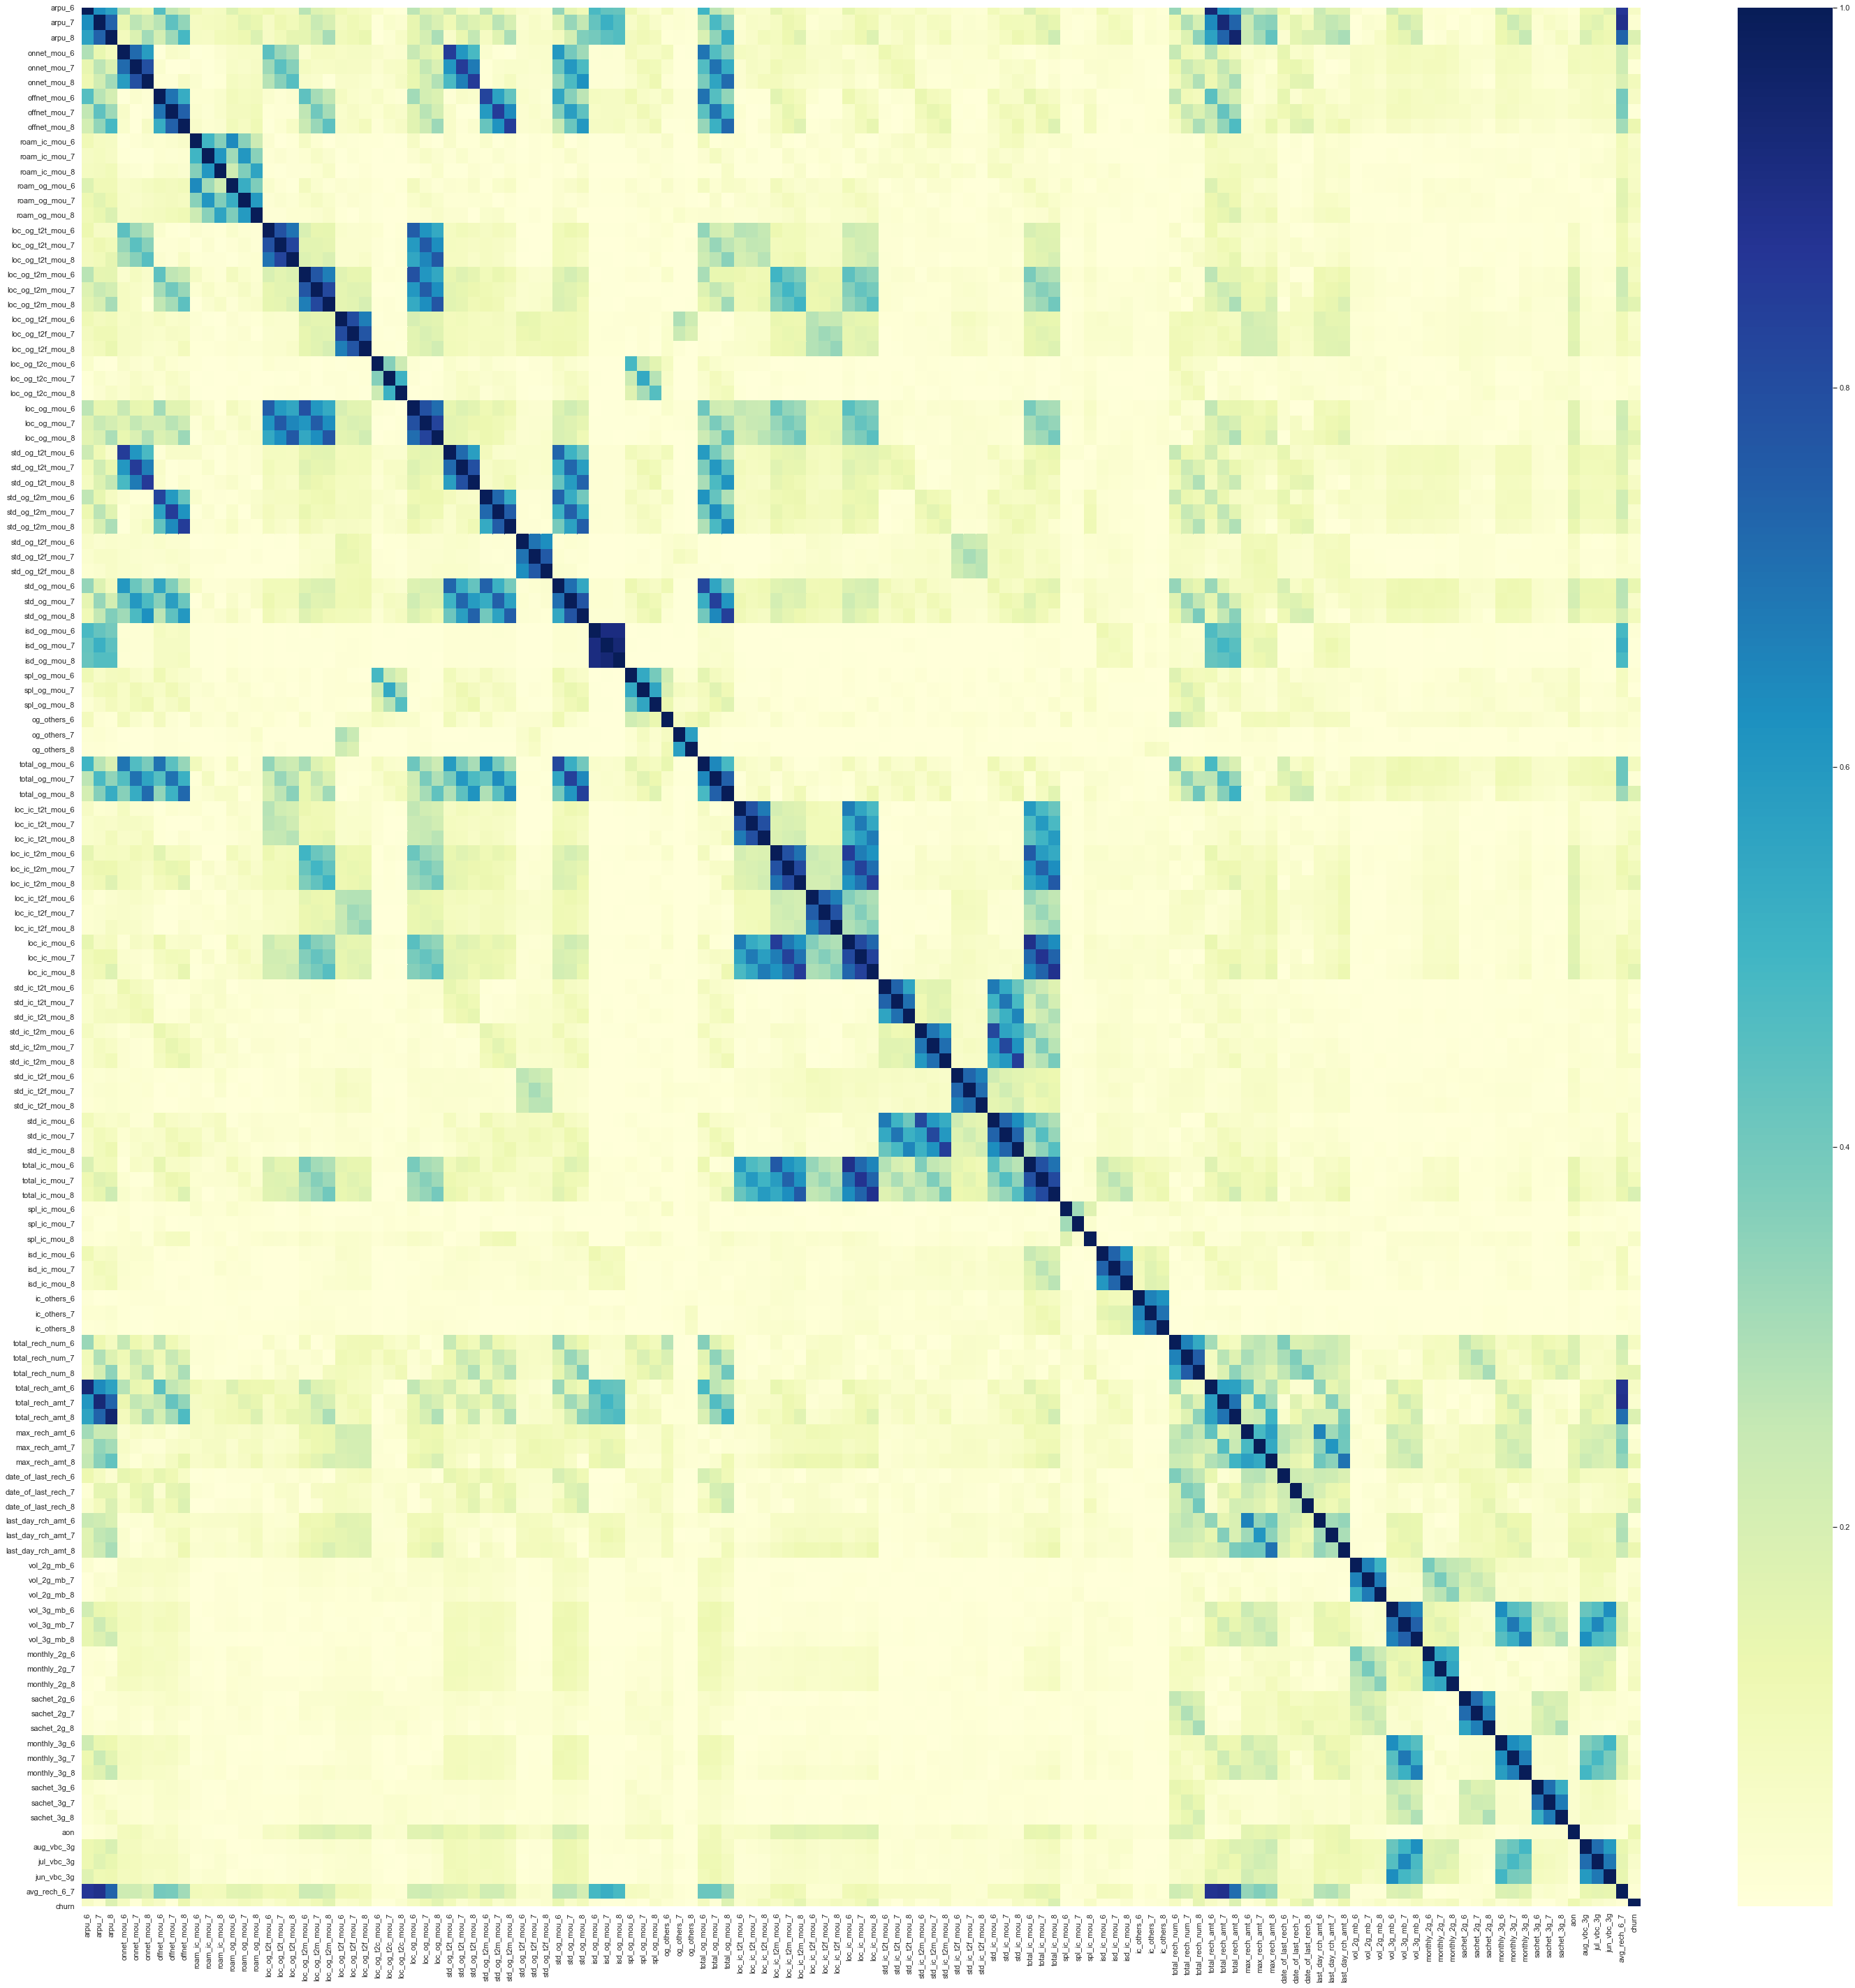

In [32]:
#Creating  correlation matrix
corr_mat = telecomChurn_df.corr().abs()
plt.figure(figsize = (50, 50))
sns.set(font_scale=1)
sns.heatmap(corr_mat, annot = False, cmap="YlGnBu")
plt.show()

From the above, its clear that there are some columns which are having high correlation with the other. These variables does not imply any sort of variance in the model building. Hence we are dropping the columns which are having correlation value greater than 0.7 or 70%

In [33]:
# Select upper triangle of correlation matrix
highCorrCol = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
drophighCorrCol = [column for column in highCorrCol.columns if any(highCorrCol[column] > 0.7)]

drophighCorrCol
#droping the high correlated features 
telecomChurn_df = telecomChurn_df.drop(drophighCorrCol, axis=1)

In [34]:
#Shape of the data frame after droping the highly correalated varaibles
telecomChurn_df.shape

(29979, 68)

In [35]:
telecomChurn_df.head()

arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
7   1069.180  1349.850  57.84        453.43        567.16         
8   378.721   492.223   413.69       94.66         80.63          
13  492.846   205.671   501.76       413.31        119.28         
16  430.975   299.869   50.51        296.29        229.74         
17  690.008   18.980    1185.91      61.64         0.00           

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7   16.23          33.49          31.64          23.74          12.59           
8   0.00           0.00           0.00           0.00           0.00            
13  23.53          144.24         72.11          7.98           35.26           
16  0.00           2.83           0.00           0.00           17.74           
17  0.00           4.76           4.81           0.00           8.46            

    ...  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  \
7   ...  0            0             0             0             0             
8   ...  3            0             0             0             0             
13  ...  3            0             0             0             0             
16  ...  0            0             0             0             0             
17  ...  0            0             0             0             0             

    sachet_3g_8   aon  aug_vbc_3g  jun_vbc_3g  churn  
7   0            802   57.74       18.74       1      
8   0            315   21.03       122.16      0      
13  0            2607  0.00        0.00        0      
16  0            511   0.00        21.89       0      
17  0            667   0.00        0.00        0      

[5 rows x 68 columns]

### Data Visualization

In [36]:
telecomChurn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 68 columns):
arpu_6                 29979 non-null float64
arpu_7                 29979 non-null float64
onnet_mou_6            29979 non-null float64
offnet_mou_6           29979 non-null float64
offnet_mou_7           29979 non-null float64
roam_ic_mou_6          29979 non-null float64
roam_ic_mou_7          29979 non-null float64
roam_ic_mou_8          29979 non-null float64
roam_og_mou_6          29979 non-null float64
roam_og_mou_7          29979 non-null float64
roam_og_mou_8          29979 non-null float64
loc_og_t2t_mou_6       29979 non-null float64
loc_og_t2m_mou_6       29979 non-null float64
loc_og_t2f_mou_6       29979 non-null float64
loc_og_t2c_mou_6       29979 non-null float64
loc_og_t2c_mou_7       29979 non-null float64
loc_og_t2c_mou_8       29979 non-null float64
std_og_t2f_mou_6       29979 non-null float64
std_og_t2f_mou_7       29979 non-null float64
isd_og_mou_6     

In [39]:
#plotting the numerical columns with respect to the Churn
num_var = [col for col in telecomChurn_df.columns if col not in ['churn']]

plt.figure(figsize=(100,500))
sns.set(font_scale=1)
i=0
for col in num_var:
    i=i+1
    plt.subplot(25,3,i)
    sns.barplot(x='churn', y=telecomChurn_df[col],data=telecomChurn_df)
    plt.title('Box Plot for '+col)
    plt.xlabel(col)


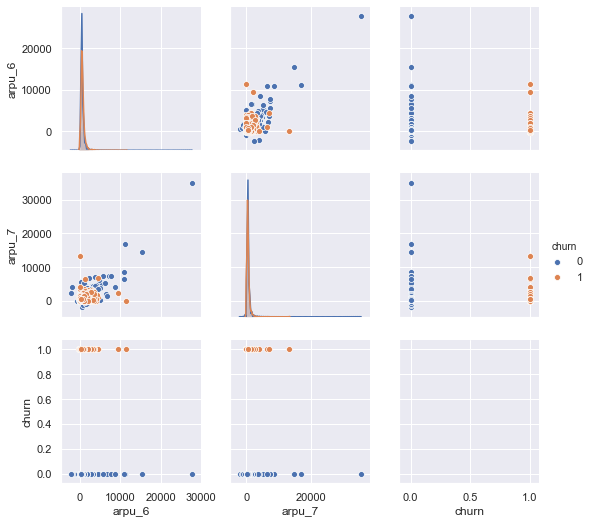

In [41]:
#plotting the pair plot of Average revenue per user for the month of June and July with Churn
sns.pairplot(data=telecomChurn_df[['arpu_6','arpu_7','churn']],hue='churn')

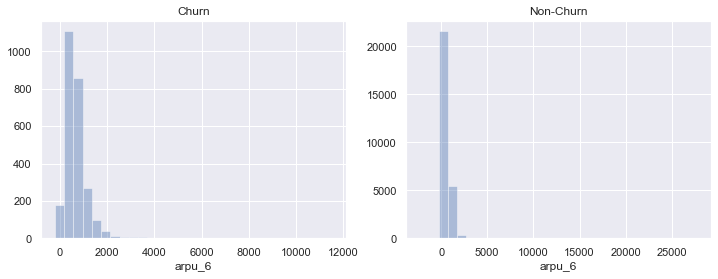

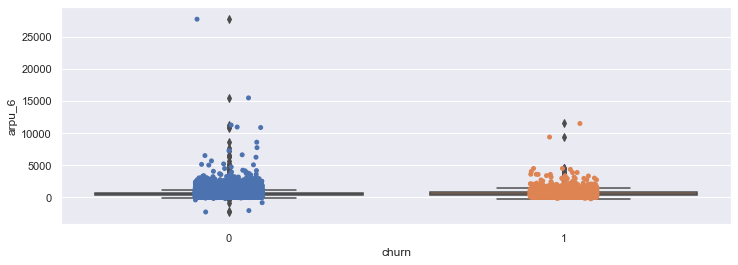

In [42]:
#plot between the Average revenue per user with the churn for the month of June.
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecomChurn_df[telecomChurn_df['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecomChurn_df[telecomChurn_df['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_6', data=telecomChurn_df)
sns.stripplot(x='churn', y='arpu_6', data=telecomChurn_df, jitter=True, edgecolor="gray")

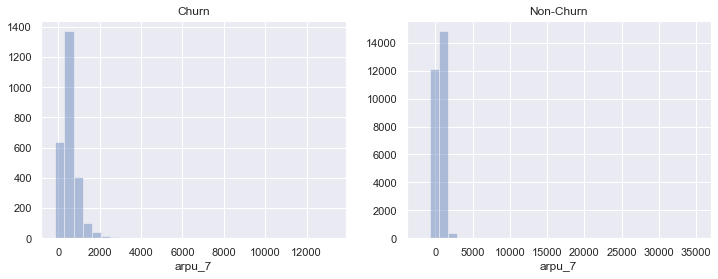

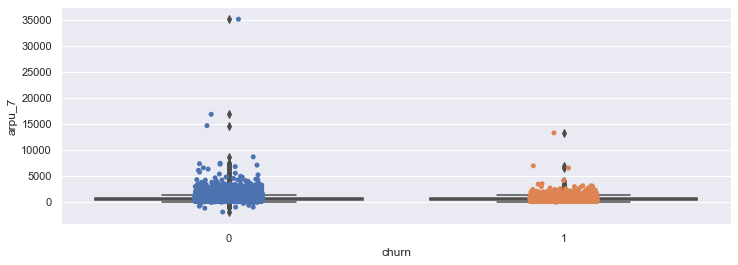

In [43]:
# perform the same for the month 7
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecomChurn_df[telecomChurn_df['churn']==1].arpu_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecomChurn_df[telecomChurn_df['churn']==0].arpu_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_7', data=telecomChurn_df)
sns.stripplot(x='churn', y='arpu_7', data=telecomChurn_df, jitter=True, edgecolor="gray")


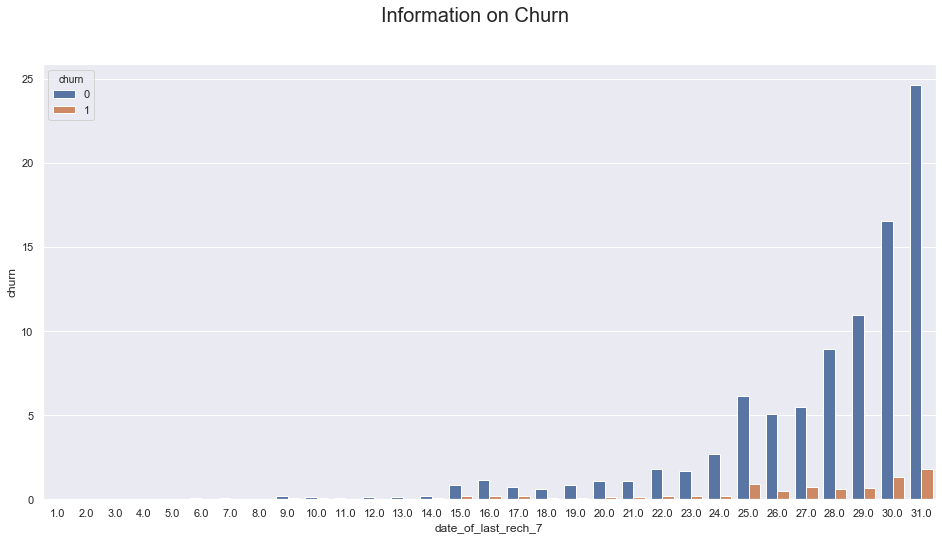

In [44]:
#plot between the Average revenue per user with the churn for the month of July.
plt.figure(figsize=(16,8))

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
#bar plot of date of last recharge in July
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecomChurn_df, estimator=lambda x: len(x) / len(telecomChurn_df) * 100)


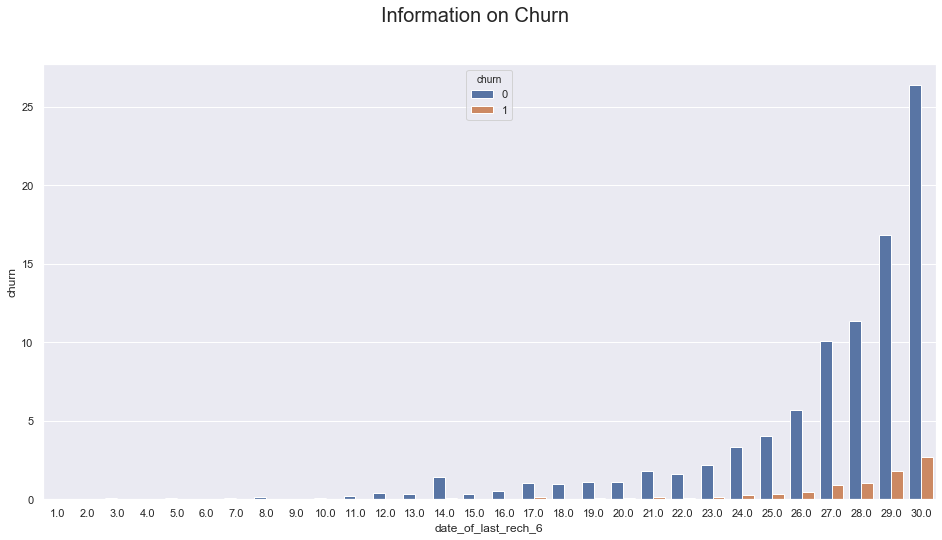

In [45]:
#plot between the Average revenue per user with the churn for the month of June.
plt.figure(figsize=(16,8))
labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
#bar plot of date of last recharge in June
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecomChurn_df,  estimator=lambda x: len(x) / len(telecomChurn_df) * 100)


## Outlier Treatment

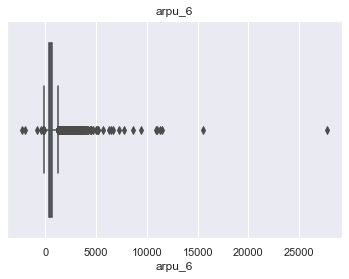

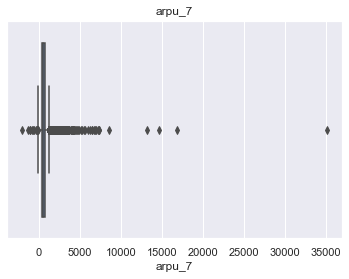

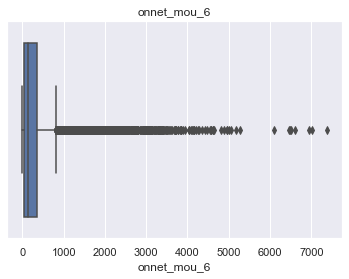

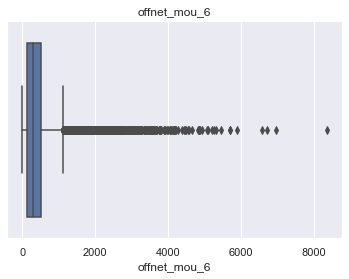

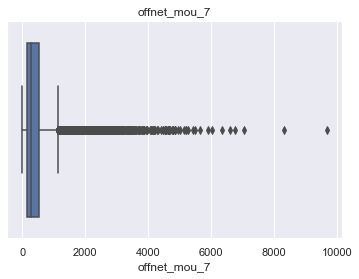

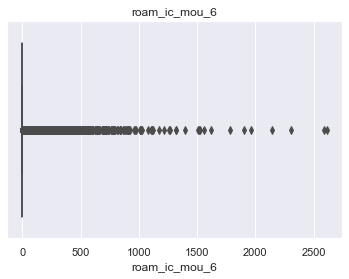

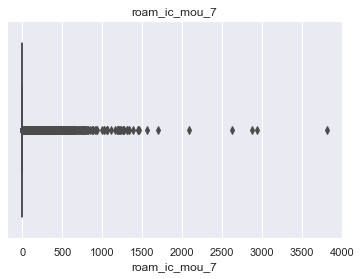

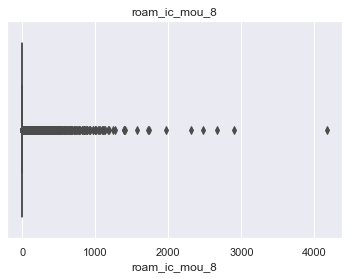

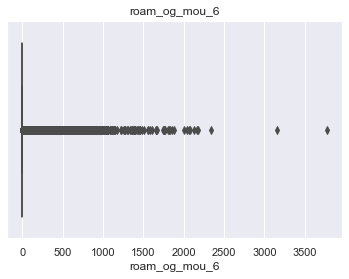

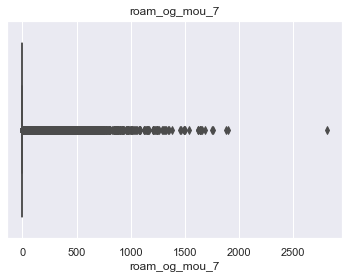

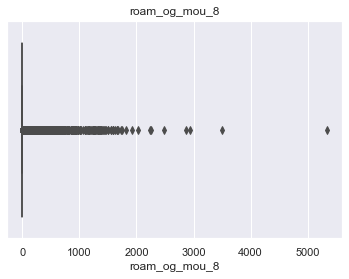

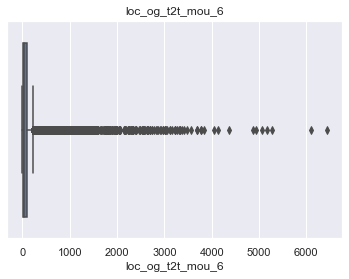

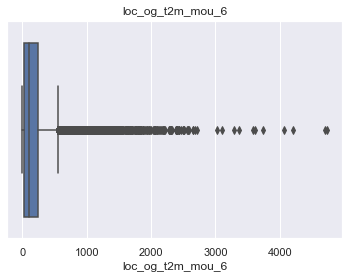

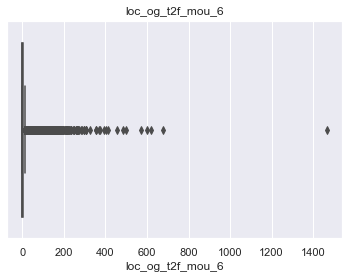

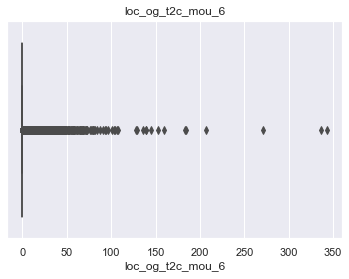

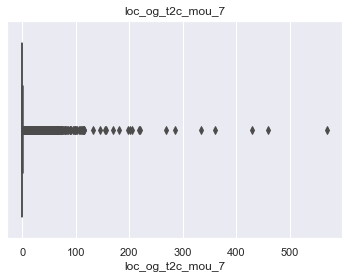

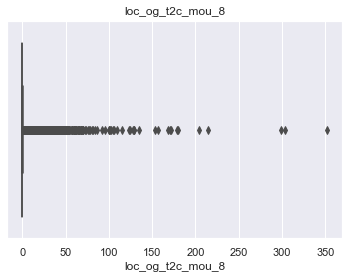

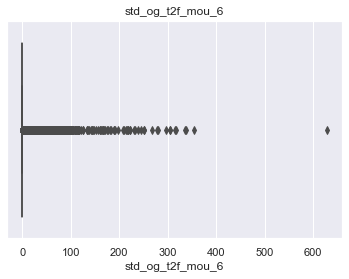

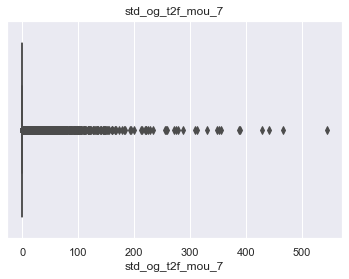

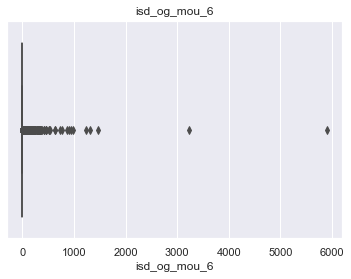

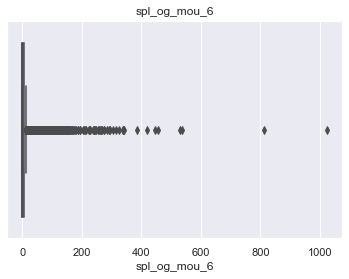

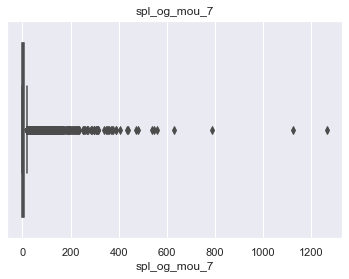

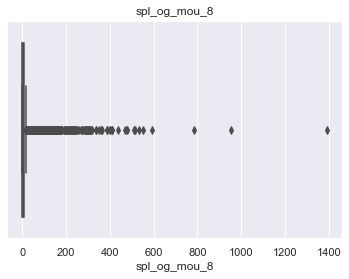

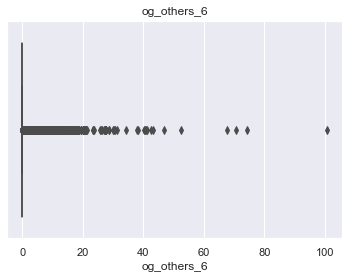

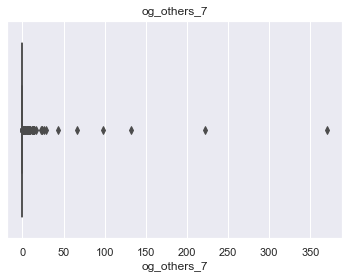

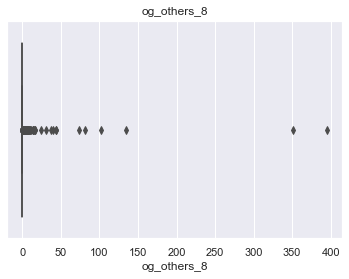

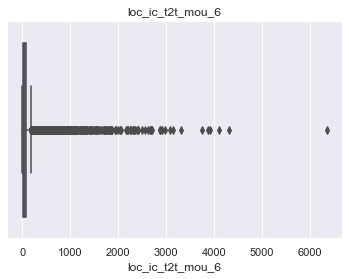

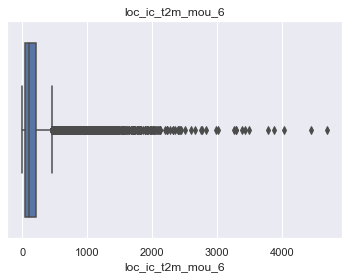

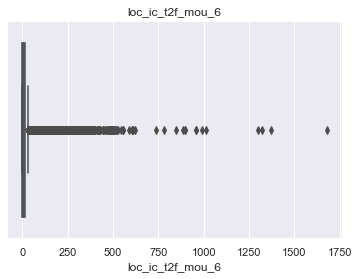

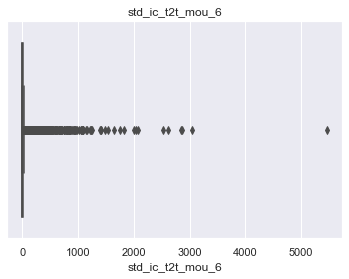

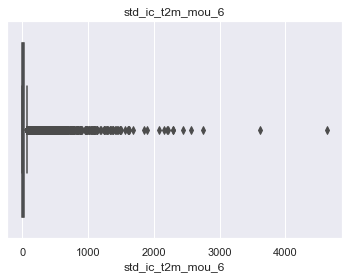

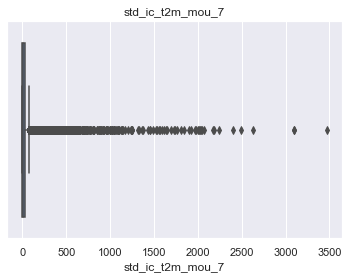

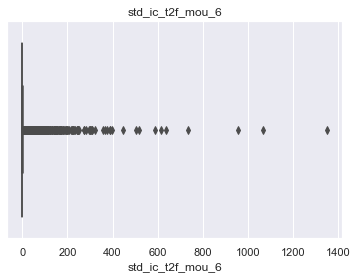

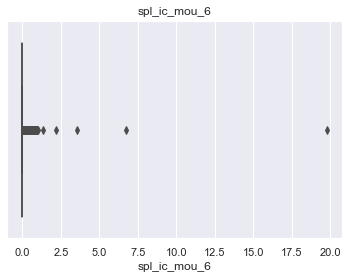

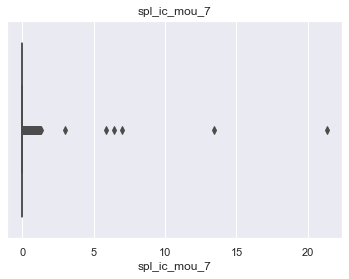

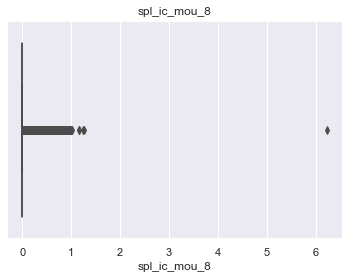

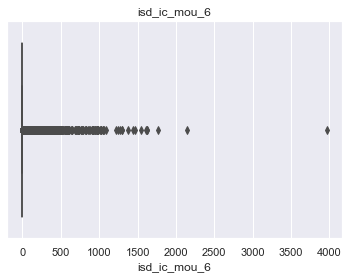

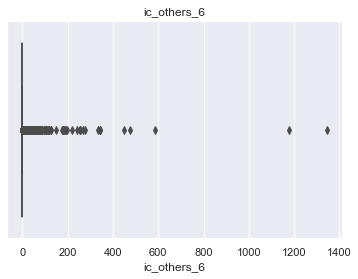

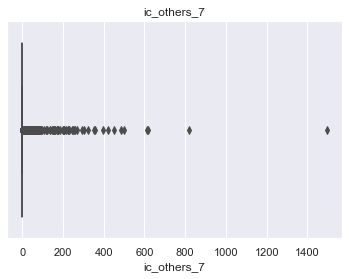

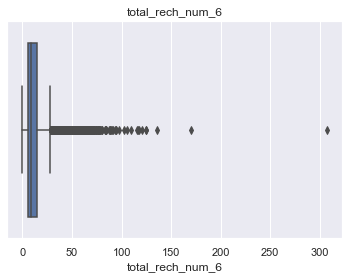

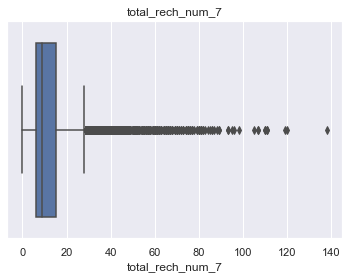

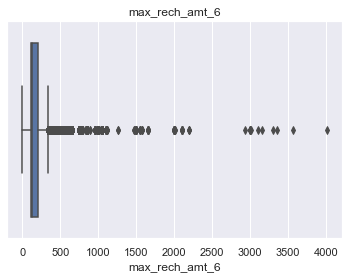

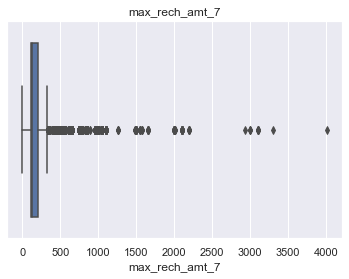

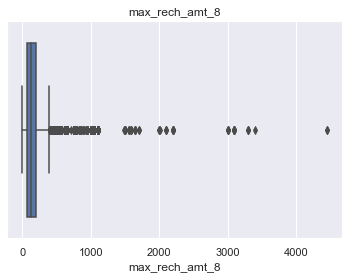

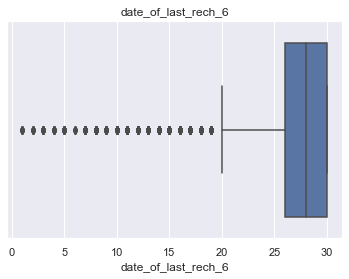

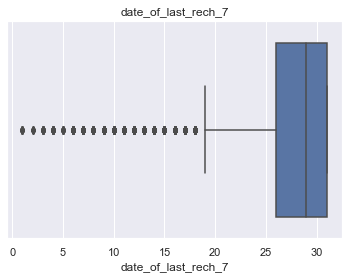

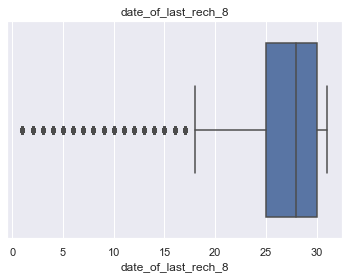

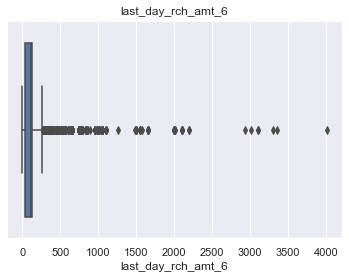

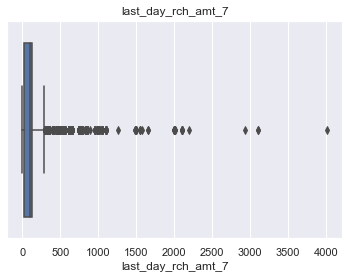

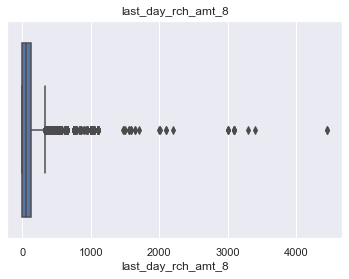

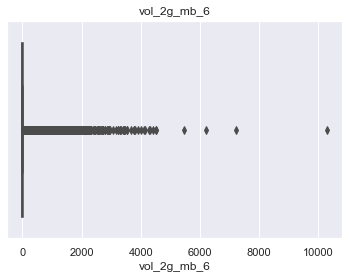

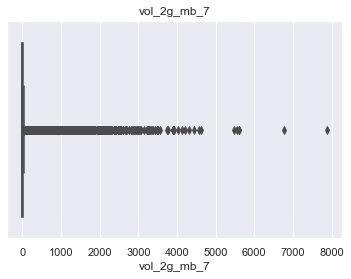

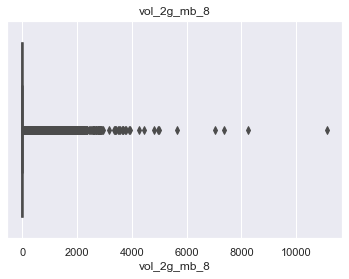

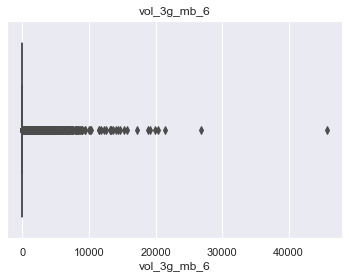

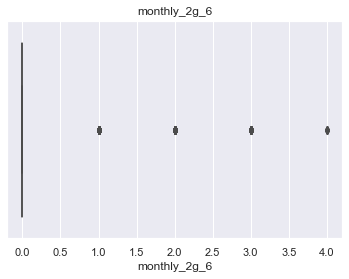

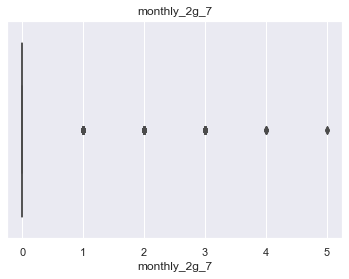

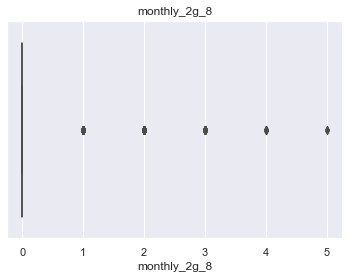

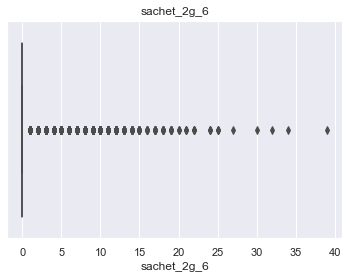

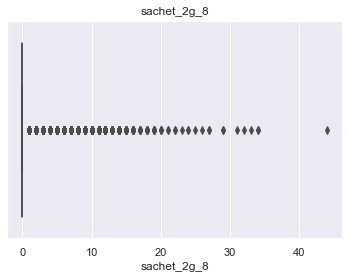

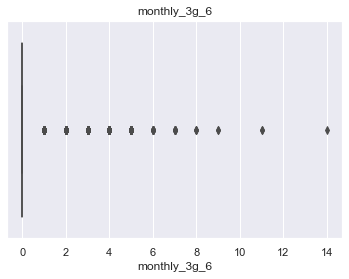

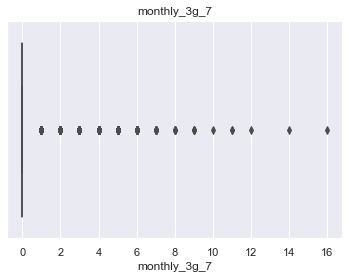

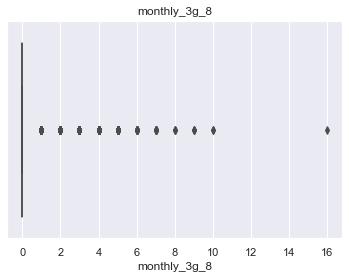

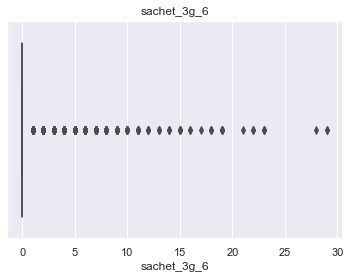

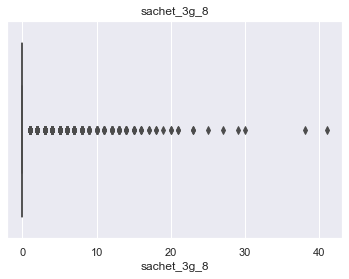

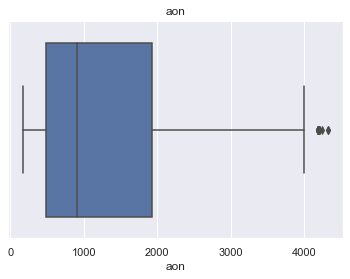

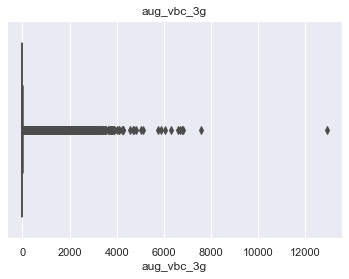

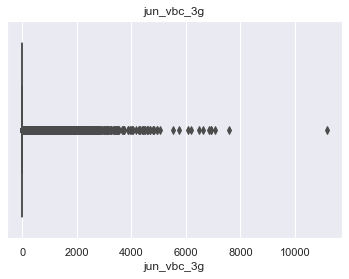

In [46]:
# #Plotting Box Plot
for i in num_var:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(telecomChurn_df[i],palette="deep")
    plt.title(i)
    plt.show()

As we can see some outliers in the data, we are capping the outliers accordingly.

In [47]:
# iterate through the columns and cap the values with the 95th percentile
for col in telecomChurn_df.columns:
    percentiles = telecomChurn_df[col].quantile([0.05,0.95]).values
    telecomChurn_df[col][telecomChurn_df[col] <= percentiles[0]] = percentiles[0]
    telecomChurn_df[col][telecomChurn_df[col] >= percentiles[1]] = percentiles[1]
telecomChurn_df.shape

(29979, 68)

Hence we have imputed values for the missing values, and performed EDA and outlier treatment. We dont have any extreme values of data and there are no misssing values in the data.Hence we are good for miving to model building

# Model Building

In [48]:
#import necessary libraries to perform the Logistic Regression, PCA, Random forest and decision trees and Metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV,train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, average_precision_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC



## Spliting the data

In [49]:
X = telecomChurn_df.drop(['churn'],axis=1)
# Putting response variable to y
Y = telecomChurn_df['churn']

In [50]:
#feature standardisation
cols = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=cols)

# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, train_size=0.7,test_size=0.3,random_state=100)

### Shapes of train and test sets

In [51]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20985, 67)
(20985,)
(8994, 67)
(8994,)


After the Splitting the Data, we are performing TWO models 
     1. Interpretatbility Model using Logistic Regression
     2. Good Model using PCA, Logistic Regression, Decision Treee and Random Forest

## Interpretability Model - Logistic Regression

In [52]:
import statsmodels.api as sm

leadScore_m1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
#Result = leadScore_m1.fit()
print(leadScore_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20919
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4055.8
Date:                Mon, 18 May 2020   Deviance:                       8111.7
Time:                        23:14:51   Pearson chi2:                 2.06e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.7462    

In [53]:
#Predicted values on the train set
Y_train_pred = leadScore_m1.predict(sm.add_constant(X_train))
Y_train_pred[:10]

88105    0.008350
34588    0.050342
16623    0.001469
54904    0.063308
33555    0.042342
25467    0.023464
44097    0.070365
81316    0.001347
20754    0.052304
4688     0.146947
dtype: float64

In [54]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.00835012, 0.05034216, 0.00146907, 0.06330802, 0.04234159,
       0.02346449, 0.07036468, 0.00134739, 0.05230379, 0.14694748])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [55]:
Y_train_pred_final = pd.DataFrame({'Churn':Y_train.values, 'Churn_Prob':Y_train_pred})
Y_train_pred_final.head()

Churn  Churn_Prob
0  0      0.008350  
1  0      0.050342  
2  0      0.001469  
3  0      0.063308  
4  0      0.042342

Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [56]:
Y_train_pred_final['Predicted'] = Y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()

Churn  Churn_Prob  Predicted
0  0      0.008350    0        
1  0      0.050342    0        
2  0      0.001469    0        
3  0      0.063308    0        
4  0      0.042342    0

In [57]:
#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[18887   324]
 [ 1300   474]]


In [58]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Churn, Y_train_pred_final.Predicted))

0.9226113890874434


In [59]:
# VIF (Variance Inflation Factor) 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
45  date_of_last_rech_7  58.19
44  date_of_last_rech_6  54.95
46  date_of_last_rech_8  46.46
0   arpu_6               21.86
1   arpu_7               17.84
39  total_rech_num_6     14.16
40  total_rech_num_7     13.52
3   offnet_mou_6         9.20 
4   offnet_mou_7         7.84 
42  max_rech_amt_7       7.77 
41  max_rech_amt_6       7.74 
43  max_rech_amt_8       7.51 
6   roam_ic_mou_7        5.22 
12  loc_og_t2m_mou_6     5.14 
9   roam_og_mou_7        5.13 
7   roam_ic_mou_8        5.04 
8   roam_og_mou_6        4.96 
10  roam_og_mou_8        4.87 
5   roam_ic_mou_6        4.86 
53  vol_3g_mb_6          4.70 
27  loc_ic_t2m_mou_6     4.64 
47  last_day_rch_amt_6   3.77 
66  jun_vbc_3g           3.62 
11  loc_og_t2t_mou_6     3.53 
48  last_day_rch_amt_7   3.53 
26  loc_ic_t2t_mou_6     3.45 
64  aon                  3.43 
2   onnet_mou_6          3.31 
49  last_day_rch_amt_8   3.28 
21  spl_og_mou_7         3.25 
30  std_ic_t2m_mou_6     3.22 
59  monthly_3g_6         3.17 
31  std_ic_t2m_mou_7     3.13 
51  vol_2g_mb_7          3.06 
22  spl_og_mou_8         2.92 
50  vol_2g_mb_6          2.86 
65  aug_vbc_3g           2.81 
60  monthly_3g_7         2.75 
20  spl_og_mou_6         2.70 
61  monthly_3g_8         2.60 
52  vol_2g_mb_8          2.54 
54  monthly_2g_6         2.52 
55  monthly_2g_7         2.38 
56  monthly_2g_8         2.21 
15  loc_og_t2c_mou_7     2.13 
16  loc_og_t2c_mou_8     2.05 
13  loc_og_t2f_mou_6     2.03 
28  loc_ic_t2f_mou_6     2.02 
57  sachet_2g_6          2.02 
14  loc_og_t2c_mou_6     1.94 
58  sachet_2g_8          1.87 
17  std_og_t2f_mou_6     1.82 
29  std_ic_t2t_mou_6     1.75 
18  std_og_t2f_mou_7     1.73 
23  og_others_6          1.58 
32  std_ic_t2f_mou_6     1.55 
62  sachet_3g_6          1.48 
36  isd_ic_mou_6         1.46 
37  ic_others_6          1.45 
38  ic_others_7          1.44 
33  spl_ic_mou_6         1.42 
19  isd_og_mou_6         1.38 
63  sachet_3g_8          1.38 
35  spl_ic_mou_8         1.19 
34  spl_ic_mou_7         1.14 
24  og_others_7         NaN   
25  og_others_8         NaN

In [60]:
#Feature Selection Using RFE
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced')
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, Y_train)

In [61]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 15),
 ('arpu_7', False, 21),
 ('onnet_mou_6', False, 42),
 ('offnet_mou_6', False, 32),
 ('offnet_mou_7', False, 33),
 ('roam_ic_mou_6', False, 9),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 11),
 ('roam_og_mou_6', False, 40),
 ('roam_og_mou_7', False, 27),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 12),
 ('loc_og_t2m_mou_6', False, 14),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2c_mou_6', False, 22),
 ('loc_og_t2c_mou_7', False, 7),
 ('loc_og_t2c_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 3),
 ('std_og_t2f_mou_7', False, 5),
 ('isd_og_mou_6', False, 31),
 ('spl_og_mou_6', False, 24),
 ('spl_og_mou_7', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('og_others_7', False, 47),
 ('og_others_8', False, 48),
 ('loc_ic_t2t_mou_6', False, 35),
 ('loc_ic_t2m_mou_6', False, 37),
 ('loc_ic_t2f_mou_6', True, 1),
 ('std_ic_t2t_mou_6', False, 28),
 ('std_ic_t2m_mou_6', False, 16),
 ('std_ic_t2m_mou_7', False, 13),
 ('std_ic_t2f

In [63]:
col = X_train.columns[rfe.support_]
list(col)

['roam_og_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_8',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'loc_ic_t2f_mou_6',
 'spl_ic_mou_8',
 'ic_others_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8']

In [64]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'ic_others_6', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'sachet_2g_6',
       'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

In [65]:
#Build logistic regression
logr = LogisticRegression()
logr.fit(X_train,Y_train)

LogisticRegression()

In [66]:
#predict result
Y_pred = logr.predict(X_test)

In [67]:
#Check confusion metrix
confusion = metrics.confusion_matrix(Y_test,Y_pred )
print(confusion)

[[8116   63]
 [ 712  103]]


## Metrics - Logistic Regression

In [68]:
#True positive 
TP = confusion[1,1] 
#True negatives
TN = confusion[0,0] 
#False positives
FP = confusion[0,1] 
#False negatives
FN = confusion[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test,Y_pred)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity) 


Accuracy : 0.9138314431843452
Sensitivity:  0.1263803680981595
Specificity:  0.9922973468639198


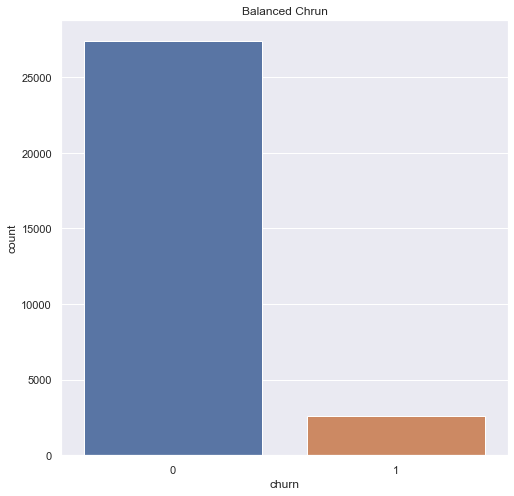

In [69]:
#plot chrun and non chrun values
plt.figure(figsize=(8, 8))
sns.countplot('churn', data=telecomChurn_df)
plt.title('Balanced Chrun')
plt.show()

In [70]:
print('%age of Non-Churn Customers: ', round(telecomChurn_df['churn'].value_counts()[0]/len(telecomChurn_df) * 100,2))
print('%age of Churn Customers: ' , round(telecomChurn_df['churn'].value_counts()[1]/len(telecomChurn_df) * 100,2))

%age of Non-Churn Customers:  91.36
%age of Churn Customers:  8.64


From the result of logistic regression we can say the dataset is imbalance

    To reduce class imbalance we will use below two techanique:
    UnderSampling
    Synthetic Minority Over-sampling Technique(SMOTE)

In [71]:
# Shuffle the Dataset.
shuffled_df = telecomChurn_df.sample(frac=1,random_state=4)

# amount of Churn customer 2441  rows.
churn_df = shuffled_df.loc[shuffled_df['churn'] == 1]

#Randomly select 2441  observations.
non_churn_df = shuffled_df.loc[shuffled_df['churn'] == 0].sample(n=2441,random_state=42)
normalized_df = pd.concat([churn_df, non_churn_df])

In [72]:
#check rows and columns of newly created dataframe 
normalized_df.shape

(5030, 68)

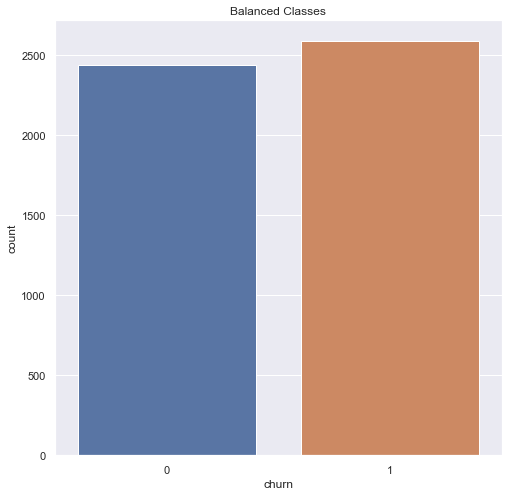

In [73]:
plt.figure(figsize=(8, 8))
sns.countplot('churn', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [74]:
# Putting feature variable to X_un
X_un = normalized_df.drop(['churn'],axis=1)

# Putting response variable to y_un
y_un = normalized_df['churn']

In [75]:
#feature standardisation
scaler = StandardScaler()
X_un_scaled = scaler.fit_transform(X_un)
X_un_scaled = pd.DataFrame(X_un, columns=X_un.columns)

In [76]:
#utting data into train and test set
X_un_train, X_un_test, y_un_train, y_un_test = train_test_split(X_un_scaled,y_un, train_size=0.7,test_size=0.3,random_state=100)

In [77]:
#build logistic regression
logr_underSapmling = LogisticRegression()
logr_underSapmling.fit(X_un_train,y_un_train)
y_pred_underSapmling =logr_underSapmling.predict(X_un_test)

In [78]:
#check confusion matrix
conf_underSapmling = metrics.confusion_matrix(y_un_test,y_pred_underSapmling)
print(conf_underSapmling)

[[571 144]
 [146 648]]


## Metrics - Logistic regression - Undersampling

In [79]:
#True positive 
TP = conf_underSapmling[1,1] 
#True negatives
TN = conf_underSapmling[0,0] 
#False positives
FP = conf_underSapmling[0,1] 
#False negatives
FN = conf_underSapmling[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(y_un_test,y_pred_underSapmling.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)


Accuracy : 0.807819748177601
Sensitivity:  0.8161209068010076
Specificity:  0.7986013986013986


## Synthetic Minority Over-sampling Technique

In [80]:
SMOTE()

SMOTE()

In [81]:
#OverSampling Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [82]:
X_os, y_os = smote.fit_sample(X_train, Y_train)

In [83]:
#Check rows and columns of new dataset
X_os.shape

(38422, 67)

In [84]:
y_os.shape

(38422,)

In [85]:
#build logistic regression over  SMOTE genrated dataset
logr = LogisticRegression()
logr.fit(X_os,y_os)

LogisticRegression()

In [86]:
#predict model
y_pred_oversampling = logr.predict(X_test)

In [87]:

#Evalute model
confusion_oversampling = metrics.confusion_matrix(Y_test,y_pred_oversampling )
print(confusion_oversampling)

[[6484 1695]
 [ 162  653]]


## Metrics - Logistic Regression - SMOTE

In [88]:
#True positive 
TP = confusion_oversampling[1,1] 
#True negatives
TN = confusion_oversampling[0,0] 
#False positives
FP = confusion_oversampling[0,1] 
#False negatives
FN = confusion_oversampling[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test,y_pred_oversampling .round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

Accuracy : 0.7935290193462308
Sensitivity:  0.8012269938650307
Specificity:  0.7927619513387945


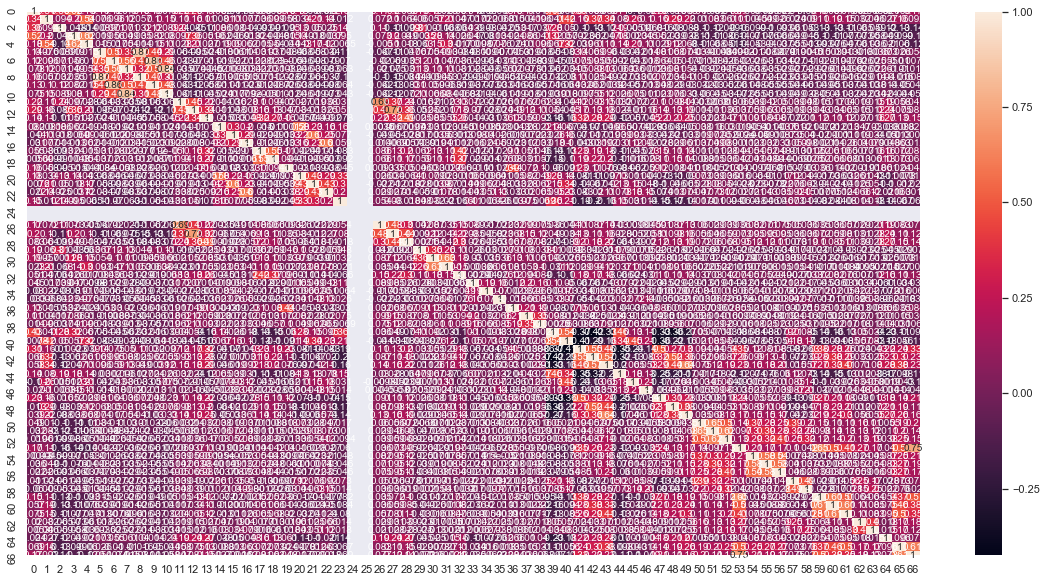

In [89]:
#Check correlation between features
corrmat = np.corrcoef(X_os.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

## PCA

In [90]:
# apply pca to train data
pca = PCA(svd_solver = 'randomized',random_state=42)
pca_churn_train = pca.fit_transform(X_train)


In [91]:
# creating data frame with PC's
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Features':colnames})
pcs_df.head()

PC1       PC2      Features
0 -0.000867  0.236505  arpu_6      
1 -0.005614  0.243342  arpu_7      
2 -0.039184  0.120897  onnet_mou_6 
3 -0.013202  0.537995  offnet_mou_6
4 -0.019143  0.539943  offnet_mou_7

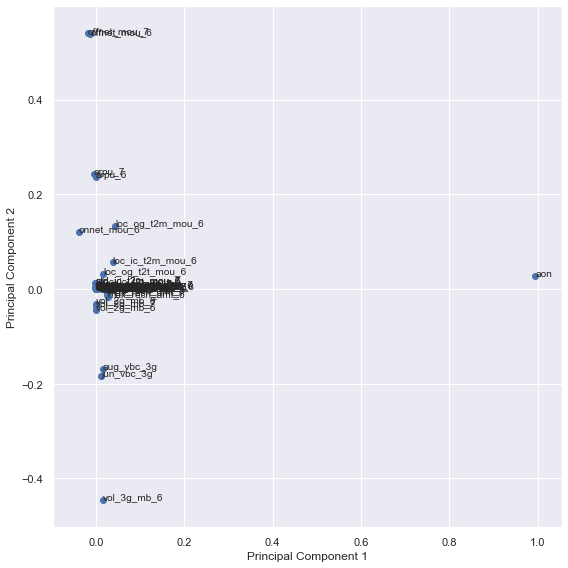

In [92]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [93]:
# Checking the variance explanation ratio to the number of components
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

0     49.17 
1     63.35 
2     76.34 
3     83.27 
4     86.88 
5     89.39 
6     91.27 
7     92.97 
8     94.40 
9     95.51 
10    96.27 
11    96.90 
12    97.32 
13    97.70 
14    98.06 
15    98.38 
16    98.67 
17    98.94 
18    99.16 
19    99.33 
20    99.49 
21    99.63 
22    99.74 
23    99.83 
24    99.88 
25    99.91 
26    99.93 
27    99.95 
28    99.96 
29    99.97 
30    99.97 
31    99.98 
32    99.98 
33    99.99 
34    99.99 
35    99.99 
36    99.99 
37    100.00
38    100.00
39    100.00
40    100.00
41    100.00
42    100.00
43    100.00
44    100.00
45    100.00
46    100.00
47    100.00
48    100.00
49    100.00
50    100.00
51    100.00
52    100.00
53    100.00
54    100.00
55    100.00
56    100.00
57    100.00
58    100.00
59    100.00
60    100.00
61    100.00
62    100.00
63    100.00
64    100.00
65    100.00
66    100.00
dtype: float64

10 components accounts for 90%  where as 15 components accounts for 98%

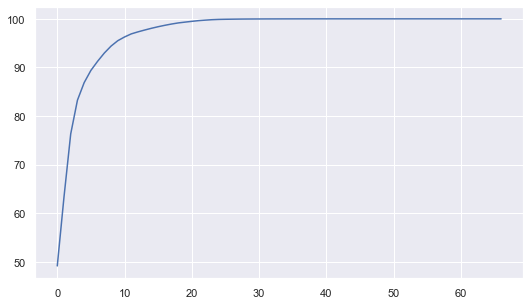

In [94]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) 
plt.plot(cumulative_variance)

In [95]:
#first 10 components expalins the maximum variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)


In [96]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_churn_train.transpose())

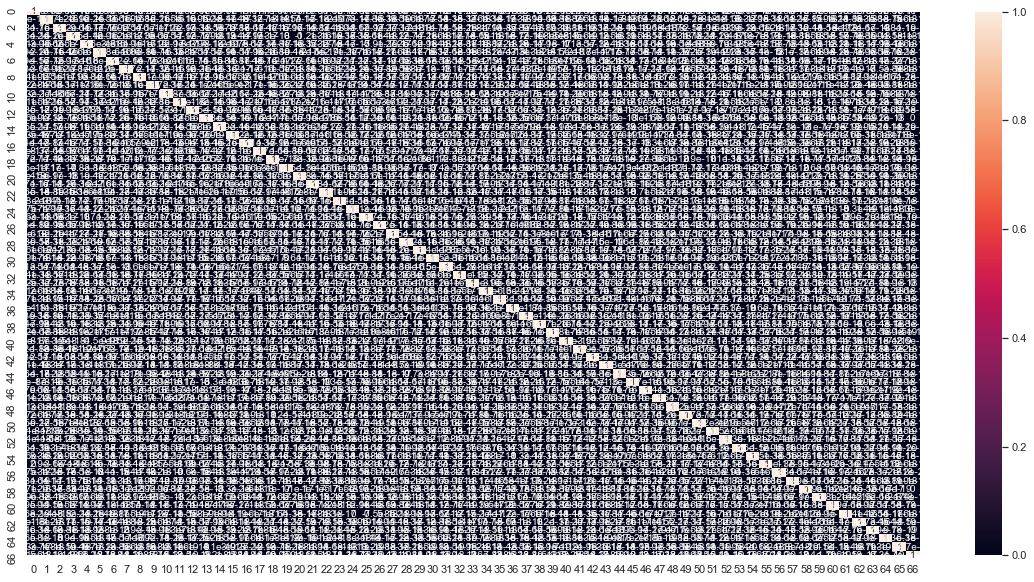

In [97]:

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [98]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.378855389006793e-15 , min corr:  -4.735027868516835e-05


In [99]:
#Applying selected components to the test data
churn_pca_final = pca_final.fit_transform(X_test)
churn_pca_final.shape

(8994, 10)

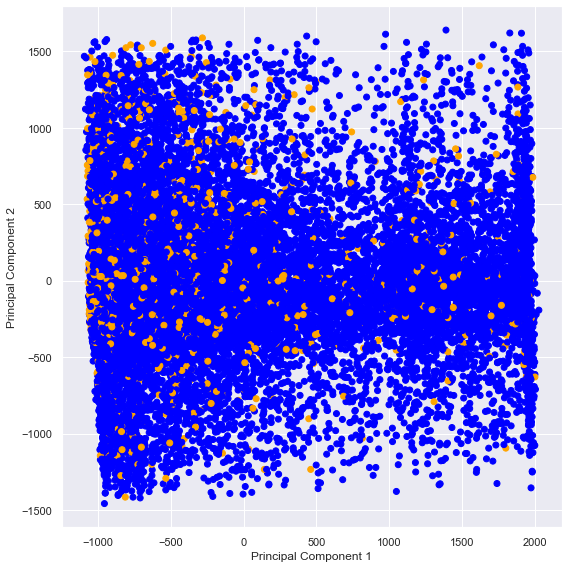

In [100]:
# Plot to see the pattern if any
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_churn_train[:,0], pca_churn_train[:,1], c = Y_train.map({0:'blue',1:'orange'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
plt.rcdefaults()

### user defined models for Cut off and ROC  

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

## PCA and Logistic Regression

In [102]:
# create pipeline
PCA_VARS = 10
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [103]:
# fit model
pipeline.fit(X_train, Y_train)

# check score on train data
pipeline.score(X_train, Y_train)

0.6853466761972837

### Evaluate on test data

In [104]:
# predict churn on test data
Y_pred = pipeline.predict(X_test)

# create onfusion matrix
CM_PCALogistic = confusion_matrix(Y_test, Y_pred)

# check sensitivity and specificity
# predict churn on test data
Y_pred = pipeline.predict(X_test)

# create onfusion matrix
conf_PCALogistic = confusion_matrix(Y_test, Y_pred)

# check sensitivity and specificity
#True positive 
TP = conf_PCALogistic[1,1] 
#True negatives
TN = conf_PCALogistic[0,0] 
#False positives
FP = conf_PCALogistic[0,1] 
#False negatives
FN = conf_PCALogistic[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, Y_pred.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))



Accuracy : 0.6929063820324661
Sensitivity:  0.6969325153374233
Specificity:  0.6925051962342584
AUC:    	 0.75


### Hyperparameter tuning - PCA and Logistic Regression

In [105]:
# class imbalance
Y_train.value_counts()/Y_train.shape

0    0.915463
1    0.084537
Name: churn, dtype: float64

In [106]:
# PCA
pca = PCA()
# using Class weight to handle the imbalance for logistic regression cost function
logisticModel = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logisticModel)
        ]

pca_logistic = Pipeline(steps)
#hyper parameter
params = {'pca__n_components': [10, 20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# choosing  5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# gridsearch object
model_logPca = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [107]:
# fit model
model_logPca.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   30.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [10, 20]},
             scoring='roc_auc', verbose=1)

In [108]:
# cross validation results
pd.DataFrame(model_logPca.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0   0.502019       0.113218      0.000000         0.000000         
1   0.423927       0.016627      0.000000         0.000000         
2   0.385719       0.007604      0.024592         0.002027         
3   0.621164       0.071869      0.033132         0.010070         
4   0.511607       0.020500      0.000000         0.000000         
5   0.577948       0.074734      0.000000         0.000000         
6   0.529814       0.066268      0.042049         0.010571         
7   0.716243       0.051000      0.058407         0.020773         
8   0.502625       0.013726      0.000000         0.000000         
9   0.649396       0.056299      0.000000         0.000000         
10  0.561388       0.034795      0.034538         0.006338         
11  0.751790       0.111505      0.031321         0.004362         
12  0.444202       0.077727      0.000000         0.000000         
13  0.607677       0.087845      0.000000         0.000000         
14  0.499604       0.062552      0.037451         0.007303         
15  0.706502       0.023412      0.046037         0.011258         
16  0.525753       0.019837      0.000000         0.000000         
17  0.631498       0.037215      0.000000         0.000000         
18  0.601422       0.037743      0.031781         0.005197         
19  0.787998       0.036682      0.043497         0.012780         
20  0.477841       0.031854      0.000000         0.000000         
21  0.629423       0.042920      0.000000         0.000000         
22  0.616241       0.047507      0.031184         0.002492         
23  0.838285       0.061574      0.043491         0.016376         
24  0.455794       0.020468      0.000000         0.000000         
25  0.664752       0.109418      0.000000         0.000000         
26  0.508089       0.064023      0.034987         0.005548         
27  0.776948       0.142126      0.035202         0.010156         
28  0.447678       0.101420      0.000000         0.000000         
29  0.574648       0.083352      0.000000         0.000000         
30  0.525770       0.079242      0.039556         0.016225         
31  0.545267       0.053537      0.021657         0.001455         

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0   0.1               l1                      10                       
1   0.1               l1                      20                       
2   0.1               l2                      10                       
3   0.1               l2                      20                       
4   0.5               l1                      10                       
5   0.5               l1                      20                       
6   0.5               l2                      10                       
7   0.5               l2                      20                       
8   1                 l1                      10                       
9   1                 l1                      20                       
10  1                 l2                      10                       
11  1                 l2                      20                       
12  2                 l1                      10                       
13  2                 l1                      20                       
14  2                 l2                      10                       
15  2                 l2                      20                       
16  3                 l1                      10                       
17  3                 l1                      20                       
18  3                 l2                      10                       
19  3                 l2                      20                       
20  4                 l1                      10                       
21  4                 l1                      20                       
22  4                 l2                      10                       
23  4                 l2       

In [109]:
# print best hyperparameters
print("Best AUC: ", model_logPca.best_score_)
print("Best hyperparameters: ", model_logPca.best_params_)

Best AUC:  0.8615611226222777
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 20}


## Perorming validation in Test data after hyper parameter tuning

In [110]:
# predict churn on test data
Y_logiPca_pred = model_logPca.predict(X_test)


# create onfusion matrix
conf_PCALogistic_h = confusion_matrix(Y_test, Y_logiPca_pred)

# check sensitivity and specificity
#True positive 
TP = conf_PCALogistic_h[1,1] 
#True negatives
TN = conf_PCALogistic_h[0,0] 
#False positives
FP = conf_PCALogistic_h[0,1] 
#False negatives
FN = conf_PCALogistic_h[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, Y_logiPca_pred.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

# check area under curve
Y_logiPca_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, Y_logiPca_pred_prob),2))


Accuracy : 0.8148765843895931
Sensitivity:  0.758282208588957
Specificity:  0.8205159554957819
AUC:    	 0.75


In [111]:
#pritning the Classification report
print(classification_report(Y_test, Y_logiPca_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8179
           1       0.30      0.76      0.43       815

    accuracy                           0.81      8994
   macro avg       0.63      0.79      0.66      8994
weighted avg       0.91      0.81      0.85      8994



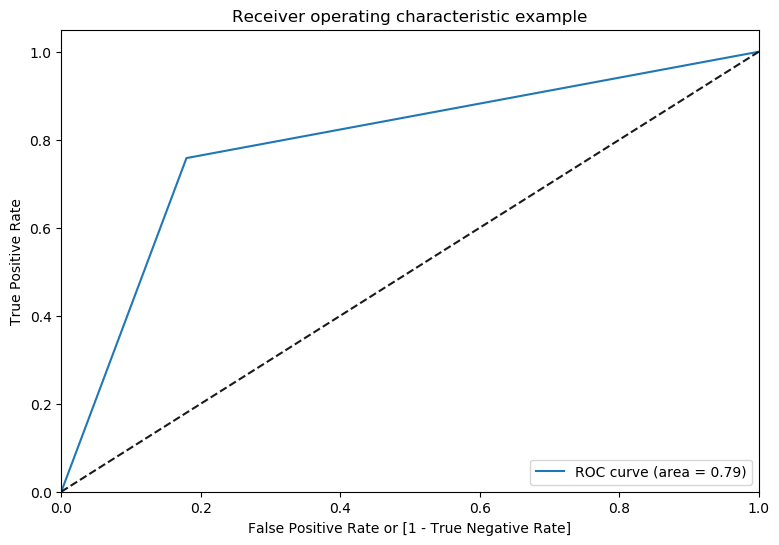

In [112]:
from sklearn.metrics import roc_curve, auc
# Plotting ROC curve using user defined function
draw_roc(Y_test, Y_logiPca_pred)

Plotting the ROC Curve An ROC curve demonstrates several things: It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## Finding Optimal Cutoff Point

In [113]:
#Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

Churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0      0.008350    0          1    0    0    0    0    0    0    0    0     
1  0      0.050342    0          1    0    0    0    0    0    0    0    0     
2  0      0.001469    0          1    0    0    0    0    0    0    0    0     
3  0      0.063308    0          1    0    0    0    0    0    0    0    0     
4  0      0.042342    0          1    0    0    0    0    0    0    0    0     

   0.9  
0  0    
1  0    
2  0    
3  0    
4  0

In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0  0.0          0.084537  1.000000     0.000000   
0.1  0.1          0.842602  0.809470     0.845661   
0.2  0.2          0.905980  0.677565     0.927073   
0.3  0.3          0.920610  0.528749     0.956796   
0.4  0.4          0.924327  0.392334     0.973453   
0.5  0.5          0.922611  0.267193     0.983135   
0.6  0.6          0.920562  0.164600     0.990370   
0.7  0.7          0.918609  0.092446     0.994899   
0.8  0.8          0.917608  0.042841     0.998386   
0.9  0.9          0.915892  0.009019     0.999636   


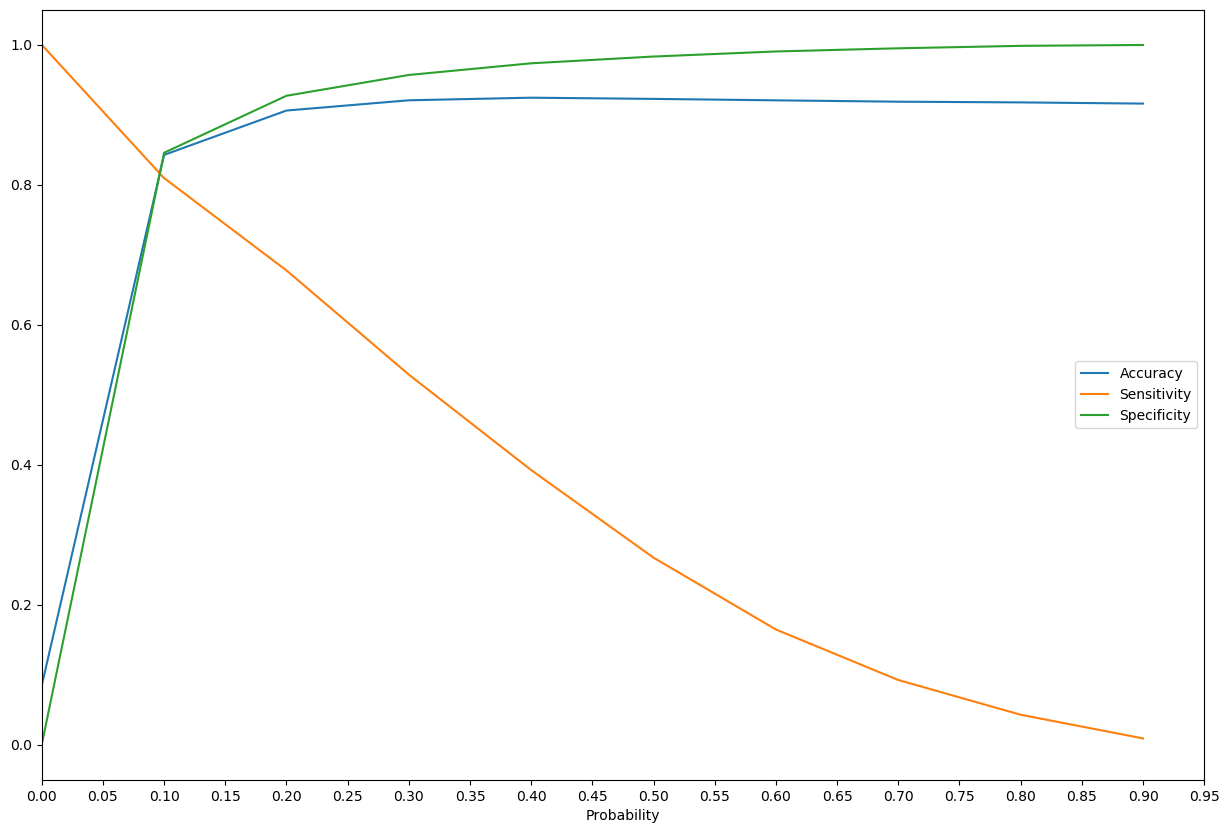

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize=(15,10))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

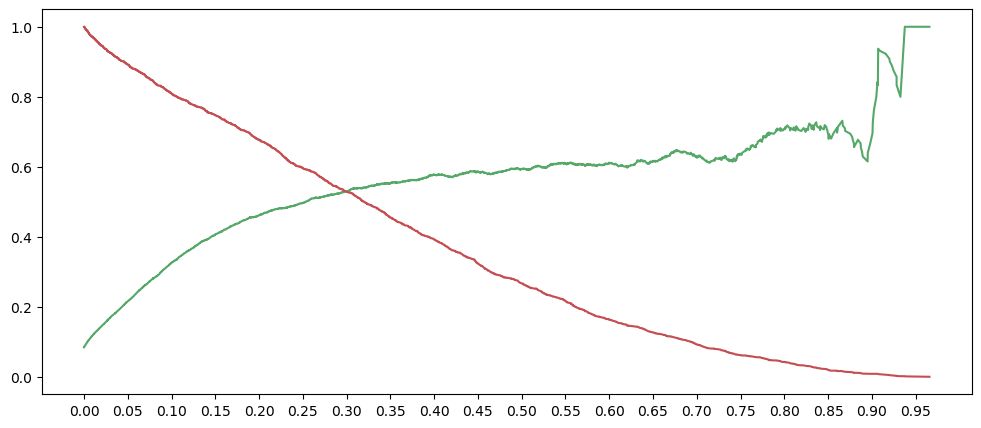

In [116]:
#plotting Precision Recall Curve
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(Y_train_pred_final.Churn, Y_train_pred_final.Churn_Prob)

plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

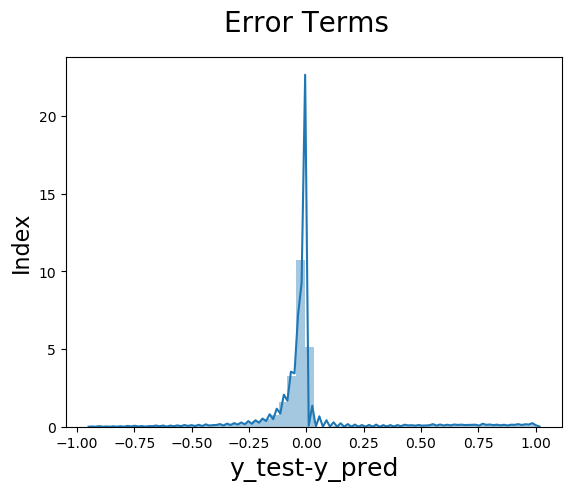

In [117]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((Y_train_pred_final.Churn -Y_train_pred_final.Churn_Prob),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

## Model Bulding Random Forest with PCA

In [118]:
print(type(X_train))
print(type(X_test))

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(20985, 67)
(8994, 67)
(20985,)
(8994,)


In [119]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_pcaRandom = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [120]:
# fit model
model_pcaRandom.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [121]:
# print best hyperparameters
print("Best AUC: ", model_pcaRandom.best_score_)
print("Best hyperparameters: ", model_pcaRandom.best_params_)

Best AUC:  0.9304374838939402
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


## validating Test Data with PCA and Random Forest 

In [122]:
# predict churn on test data
Y_pcaRandom_pred = model_pcaRandom.predict(X_test)


# create onfusion matrix
CM_PCARandom = confusion_matrix(Y_test, Y_pcaRandom_pred)


# check sensitivity and specificity
#True positive 
TP = CM_PCARandom[1,1] 
#True negatives
TN = CM_PCARandom[0,0] 
#False positives
FP = CM_PCARandom[0,1] 
#False negatives
FN = CM_PCARandom[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, Y_pred.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

# check area under curve
Y_pcaRandom_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(Y_test, Y_pcaRandom_pred_prob),2))

# check precision Score
print('Average Precision Score: ', round(average_precision_score(Y_test, Y_pcaRandom_pred_prob),2))


Accuracy : 0.6929063820324661
Sensitivity:  0.42208588957055215
Specificity:  0.9842279007213596
AUC: 	 0.75
Average Precision Score:  0.25


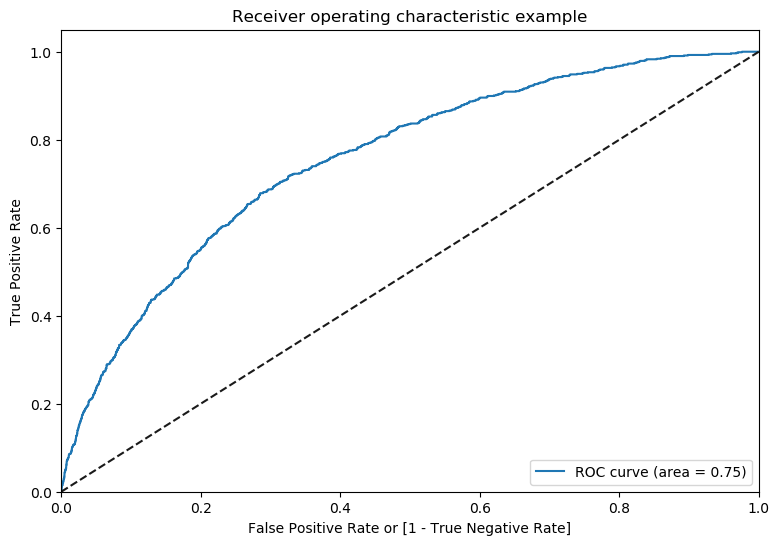

In [123]:
# Plotting ROC curve using user defined function
draw_roc(Y_test, Y_pcaRandom_pred_prob)

Poor sensitivity. The best model is PCA along with Logistic regression

## Model building - Decision tree with PCA

In [124]:

from sklearn.tree import DecisionTreeClassifier

In [125]:
# Construct pipeline
pipe = Pipeline([('pca', PCA(n_components=40)), ('clf', DecisionTreeClassifier(class_weight = 'balanced', max_depth = 6, min_samples_leaf = 40, min_samples_split = 25, criterion = 'gini', max_features = 40))])

# Fit the pipeline
pipe.fit(X_train, Y_train)

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                        max_features=40, min_samples_leaf=40,
                                        min_samples_split=25))])

In [126]:
# Make Predictions
y_pred_dt = pipe.predict(X_test)

In [127]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      8179
           1       0.26      0.75      0.38       815

    accuracy                           0.78      8994
   macro avg       0.61      0.77      0.62      8994
weighted avg       0.90      0.78      0.82      8994



In [128]:

# create onfusion matrix
CM_PCADt = confusion_matrix(Y_test, y_pred_dt)


# check sensitivity and specificity
#True positive 
TP = CM_PCADt[1,1] 
#True negatives
TN = CM_PCADt[0,0] 
#False positives
FP = CM_PCADt[0,1] 
#False negatives
FN = CM_PCADt[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, y_pred_dt.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

# check area under curve
Y_pcaDt_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(Y_test, Y_pcaDt_pred_prob),2))

# check precision Score
print('Average Precision Score: ', round(average_precision_score(Y_test, Y_pcaDt_pred_prob),2))


Accuracy : 0.7799644207249278
Sensitivity:  0.7521472392638037
Specificity:  0.7827362758283408
AUC: 	 0.75
Average Precision Score:  0.25


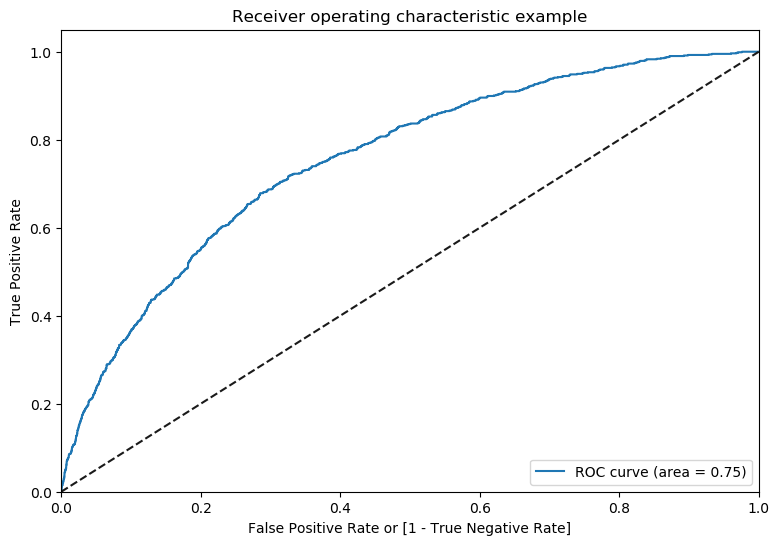

In [129]:
# Plotting ROC curve using user defined function
draw_roc(Y_test, Y_pcaDt_pred_prob)

In [130]:
#Build DecisionTree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)
Y_dtPca_pred = dt.predict(X_test)

In [131]:
# create onfusion matrix
CM_PCADt_2 = confusion_matrix(Y_test, Y_dtPca_pred)
# check sensitivity and specificity
#True positive 
TP = CM_PCADt_2[1,1] 
#True negatives
TN = CM_PCADt_2[0,0] 
#False positives
FP = CM_PCADt_2[0,1] 
#False negatives
FN = CM_PCADt_2[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(Y_test, Y_dtPca_pred.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

# check area under curve
Y_dtPca_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(Y_test, Y_dtPca_pred_prob),2))

# check precision Score
print('Average Precision Score: ', round(average_precision_score(Y_test, Y_dtPca_pred_prob),2))


Accuracy : 0.9276184122748499
Sensitivity:  0.37668711656441717
Specificity:  0.9825162000244528
AUC: 	 0.75
Average Precision Score:  0.25


# Final Model Selection

From the above Models, we found Decision Trees with PCA got good accurate model with a accuracy of 92.78.
Hence, a Decision Trees is the best model to use for churn prediction. Best parameters:
    
    Number of componets: 10 
    

# Final Predictions

In this section, We are going to create a dataframe with the Mobile number, churn, actual churn data.

In [132]:
# Generate the final prediction dataframe
mobile_number = telecom_df['mobile_number']
Y_actual = telecom_df['churn']

telecomChurn_df_final = pd.DataFrame()
telecomChurn_df_final['mobile_number'] = mobile_number
telecomChurn_df_final['Actual Churn'] = Y_actual

telecomChurn_df_final.head()

mobile_number  Actual Churn
7   7000701601     1           
8   7001524846     0           
13  7002191713     0           
16  7000875565     0           
17  7000187447     0

In [133]:
# Make final predictions
Y_prediction_final = pipe.predict(X_scaled)

# Print the classification report
print(classification_report(Y_actual, Y_prediction_final))

# create onfusion matrix
conf_final = confusion_matrix(Y_actual, Y_prediction_final)
# check sensitivity and specificity
#True positive 
TP = conf_final[1,1] 
#True negatives
TN = conf_final[0,0] 
#False positives
FP = conf_final[0,1] 
#False negatives
FN = conf_final[1,0]
total = sum(sum(conf_final))
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
accuracy = ((TP+TN)/ total)
print("Accuracy : ", accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)






              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27390
           1       0.27      0.80      0.41      2589

    accuracy                           0.80     29979
   macro avg       0.62      0.80      0.64     29979
weighted avg       0.92      0.80      0.84     29979

Accuracy :  0.7962573801661162
Sensitivity:  0.8033989957512553
Specificity:  0.795582329317269


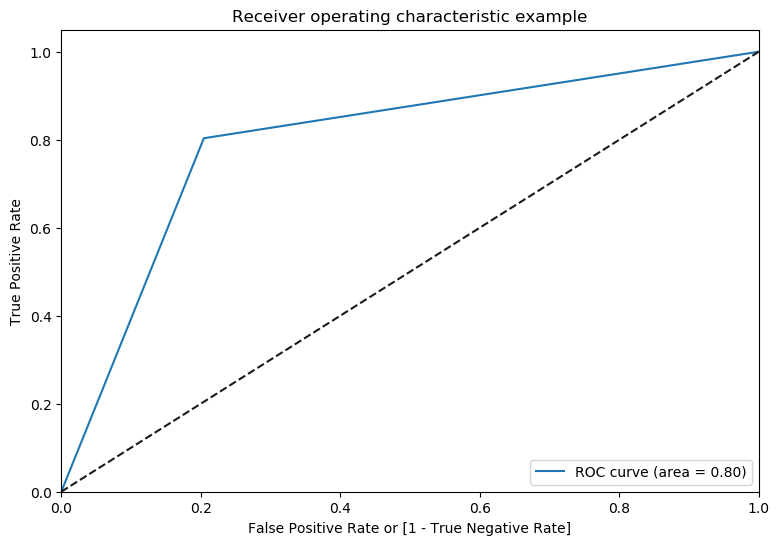

In [134]:
draw_roc(Y_actual, Y_prediction_final)

In [135]:
auc = roc_auc_score(Y_actual, Y_prediction_final)
print('Area Under The Curve: ', "{:.2%}".format(auc))

aps = average_precision_score(Y_test, Y_dtPca_pred_prob)
print('Average Precision Score: ', "{:.2%}".format(aps))

Area Under The Curve:  79.95%
Average Precision Score:  25.03%


We have good final results with Decision Tree Model and PCA derived components (10 components):
        
        Accuracy: 79.6%
        Specificity: 79.5%
        Sensitivity: 80.33%
        Area Under the Curve: 80%

In [136]:
# Align the final prediction data frame
telecomChurn_df_final['Predicted Churn'] = Y_prediction_final
telecomChurn_df_final = telecomChurn_df_final.reset_index(drop = True)

telecomChurn_df_final.head()

mobile_number  Actual Churn  Predicted Churn
0  7000701601     1             0              
1  7001524846     0             0              
2  7002191713     0             1              
3  7000875565     0             0              
4  7000187447     0             1

In [137]:
#mapping the 0 and 1 to Not churn and churn
telecomChurn_df_final['Actual Churn'] = telecomChurn_df_final['Actual Churn'].map({1: 'Churn', 0: 'Not Churn'})
telecomChurn_df_final['Predicted Churn'] = telecomChurn_df_final['Predicted Churn'].map({1: 'Churn', 0: 'Not Churn'})
telecomChurn_df_final.head()

mobile_number Actual Churn Predicted Churn
0  7000701601     Churn        Not Churn     
1  7001524846     Not Churn    Not Churn     
2  7002191713     Not Churn    Churn         
3  7000875565     Not Churn    Not Churn     
4  7000187447     Not Churn    Churn

# Conclusions & Recommendations

### Conclusions:
    1. Average Revenue per user decreases from 6th month(June) to 7th month(July) and 7th month(July) to 8th Month(August) as most of the users are churned by the 8th month(August)
    2. Most of the Users are churned in the last week of the month(25th to 31 st)
    3. When the user gets higher the incoming roaming amount, there are a chances of high churn rate
    
### Recommendations:
    1. As the most of the customers are churned during the last week of the month, hence it is advaisable to send out offers or any benefits in the 3rd week of the month. Hence the churn rate can be further reduces.
    2. Need to increase the focus on the last day of the recharge especially on those customers those who have not recharged during the month. 
    3. Need to increase focus on the higher incoming roaming amount. A good offers make customers stay in the network while they are in roaming. 
    4. STD and ISD rates are too high, if any good offers provided to the customers then there likely to be a less chance of churn rate.